In [1]:
import matplotlib.pyplot as plt
from cycler import cycler

plt.style.use('ggplot')

# Dataset

In [2]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [3]:
dataset_df

PTTp                 PTTf                PTTd  \
0      0.0883809523809524  0.44000000000000006  2.6733333333333333   
1     0.07000000000000002  0.41515789473684217               1.672   
2     0.07847619047619048  0.44320000000000004               0.504   
3     0.05676190476190477   0.3928000000000001               3.544   
4                  0.0712   0.4374736842105264  3.2440000000000007   
...                   ...                  ...                 ...   
4940   0.5011428571428571   0.3822857142857144   2.518857142857143   
4941   0.3381333333333334   0.2661333333333333   4.872571428571429   
4942   0.5068571428571428  0.41599999999999987  1.0426666666666666   
4943  0.29947826086956525  0.20973913043478265  3.3327999999999998   
4944   0.2998260869565218  0.21008695652173917  3.3327999999999998   

               HeartRate                 SBP                DBP  \
0     125.12695097297141  130.43329604900043  64.68913169835835   
1     123.96177910670554  157.72738151641408  64.38629825186952   
2     121.96242854624663  140.10442869493437  50.98347603952466   
3     129.59047971954195  138.06274513634833  55.58459066198415   
4     121.84646571478936   132.6019742786947  55.93626821274539   
...                  ...                 ...                ...   
4940   90.13468008419939   168.8285046099021  97.14496720610043   
4941   90.51399808433051  138.18569728798263  78.64674610664025   
4942   90.51821592016374   178.1948408953702  78.07234000152394   
4943  155.74575797668763  113.00553565632205  56.17062845987654   
4944  155.85092424351424  113.00571964461032  56.17071991325288   

                      AI   LASI                  S1                  S2  ...  \
0     0.9922470519252067  2.392  11.784402737047898   4.340562267839687  ...   
1     0.9177047289504034   3.84   6.033327859237537    7.44174467253177  ...   
2      0.989021633839199   1.48  3.8016195503421315   2.742877028347996  ...   
3     0.9848300582474556   0.48  13.149560899315741  0.9034979472140763  ...   
4     0.9975117862755369  1.488   6.727907722385142   2.710827761485826  ...   
...                  ...    ...                 ...                 ...  ...   
4940  0.9449321628092577  4.008    8.27980136852395     7.3020715542522  ...   
4941   0.894874694922317  0.504    16.8972715542522  1.0228183773216033  ...   
4942  0.9983107051241943  2.824  6.2422357771260994   4.815519843597263  ...   
4943   0.997623177233892  7.712   3.030912218963832   15.89653567937439  ...   
4944   0.997623177233892  7.712   3.030912218963832   15.89653567937439  ...   

        peak_to_peak_time     asymmetry_ratio   harmonic_ratio_2nd  \
0      0.4666666666666666  0.8040022713177757  0.14301352213544963   
1      0.4389090909090909  0.7783734207662544  0.16611602493808017   
2     0.47428571428571425    1.15724275040526  0.16548260559862993   
3     0.44145454545454554  0.7633618971229377   0.2016681716303435   
4     0.48039999999999994  0.7788374846388108   0.1692350840313054   
...                   ...                 ...                  ...   
4940   0.5177777777777779  0.8810828474878966  0.17322019201642547   
4941  0.36953846153846154  1.1478687706108859  0.13306029210963277   
4942   0.5750588235294117  0.7496781137323001  0.09557159401572615   
4943  0.40486956521739126  1.0383570489818539   0.3076105272386495   
4944  0.40486956521739126  1.0383570489818539   0.3076105272386495   

        harmonic_ratio_3rd    ptt_peak_enhanced    ptt_foot_enhanced  \
0     0.007591979534406322  0.08952380952380953               0.4272   
1     0.015676812662872748  0.08320000000000002  0.40840000000000004   
2     0.010942774906314009  0.07961904761904763               0.4304   
3      0.01275581670595448  0.06080000000000001  0.39360000000000006   
4      0.01075733949843127                0.072  0.41600000000000004   
...                    ...                  ...                  ...   
4940  0.012826658430954615                0.408  0.40853333333333347 

In [4]:
import os

os.makedirs('figures', exist_ok=True)

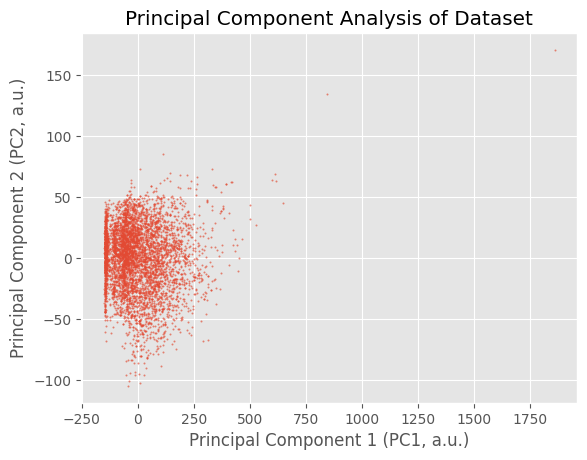

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP', 'pulse_pressure', 'map_pressure']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        label_dir_name = label.lower().replace(" ", "_")
        label_dir = f'figures/{label_dir_name}'
        os.makedirs(label_dir, exist_ok=True)
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.savefig(f'figures/{label_dir_name}/calibration_curve.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.savefig(f'figures/{label_dir_name}/error_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()
    return r2, mse, rmse, mae

# Evaluation against Measurement Standards

In [8]:
import numpy as np

def evaluate_bhs(differences_mmHg):
    differences_mmHg = np.abs(differences_mmHg)
    n = len(differences_mmHg)
    pct_5 = np.sum(differences_mmHg <= 5) / n * 100
    pct_10 = np.sum(differences_mmHg <= 10) / n * 100
    pct_15 = np.sum(differences_mmHg <= 15) / n * 100

    # Assign grade
    if pct_5 >= 60 and pct_10 >= 85 and pct_15 >= 95:
        grade = 'A'
    elif pct_5 >= 50 and pct_10 >= 75 and pct_15 >= 90:
        grade = 'B'
    elif pct_5 >= 40 and pct_10 >= 65 and pct_15 >= 85:
        grade = 'C'
    else:
        grade = 'D'

    return {
        'grade': grade,
        'percent_within_5mmHg': pct_5,
        'percent_within_10mmHg': pct_10,
        'percent_within_15mmHg': pct_15
    }

def evaluate_aami(differences_mmHg):
    differences_mmHg = np.array(differences_mmHg)
    mean_error = np.mean(differences_mmHg)
    std_dev = np.std(differences_mmHg, ddof=1)  # Sample std dev

    pass_fail = 'Pass' if abs(mean_error) <= 5 and std_dev <= 8 else 'Fail'

    return {
        'pass_fail': pass_fail,
        'mean_error_mmHg': mean_error,
        'std_dev_mmHg': std_dev
    }

# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [9]:
def train_and_evaluate_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    model = model_cls(**(model_kwargs or {}))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    return y_test, y_pred

def print_cross_val_results(label, metrics, bhs_results, aami_results):
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")
    
    # Aggregate BHS results
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    print(f"\n{label} BHS Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Grade: {avg_bhs['grade']}")
    print(f"Percent within 5 mmHg: {avg_bhs['percent_within_5mmHg']:.3e}%")
    print(f"Percent within 10 mmHg: {avg_bhs['percent_within_10mmHg']:.3e}%")
    print(f"Percent within 15 mmHg: {avg_bhs['percent_within_15mmHg']:.3e}%")
    
    # Aggregate AAMI results
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    print(f"\n{label} AAMI Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Mean Error (mmHg): {avg_aami['mean_error_mmHg']:.3e}")
    print(f"Standard Deviation (mmHg): {avg_aami['std_dev_mmHg']:.2f}")
    print(f"Pass/Fail: {avg_aami['pass_fail']}")

In [10]:
import time
import pickle
import sys

ALL_RESULTS = []
ALL_RESULTS_COLUMNS = [
    'Model', 'R^2', 'R^2 StdErr', 'MSE', 'MSE StdErr', 'RMSE', 'RMSE StdErr', 'MAE', 'MAE StdErr',
    'BHS Grade', 'BHS % within 5mmHg', 'BHS % within 5mmHg StdErr', 'BHS % within 10mmHg', 'BHS % within 10mmHg StdErr', 'BHS % within 15mmHg', 'BHS % within 15mmHg StdErr',
    'AAMI Pass/Fail', 'AAMI Mean Error (mmHg)', 'AAMI Mean Error StdErr', 'AAMI Std Dev (mmHg)', 'AAMI Std Dev StdErr',
    'Avg Inference Time (ms)', 'Inference Time StdErr', 'Inference Time Std (ms)', 'Model Size (bytes)', 'Model Size StdErr'
]

def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, inference_tests=1000):
    metrics = []
    bhs_results = []
    aami_results = []
    inference_times = []
    model_sizes = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        
        # Train model
        model = model_cls(**(model_kwargs or {}))
        model.fit(X_train, y_train)
        
        # Measure model size
        model_bytes = pickle.dumps(model)
        model_size = sys.getsizeof(model_bytes)
        model_sizes.append(model_size)
        
        # Make predictions for evaluation
        y_pred = model.predict(X_test)
        if scale_y and y_scaler is not None:
            y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
            y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        
        # Measure inference time
        single_sample = X_test[:1]  # Use first test sample
        fold_inference_times = []
        for _ in range(inference_tests):
            start_time = time.time()
            _ = model.predict(single_sample)
            end_time = time.time()
            fold_inference_times.append((end_time - start_time) * 1000)  # Convert to ms
        inference_times.extend(fold_inference_times)
        
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} Fold {fold+1}")
        metrics.append([r2, mse, rmse, mae])
        
        # Evaluate against standards
        differences = y_test - y_pred
        bhs_results.append(evaluate_bhs(differences))
        aami_results.append(evaluate_aami(differences))
    
    print_cross_val_results(label, metrics, bhs_results, aami_results)

    # Convert to arrays and aggregate
    metrics = np.array(metrics)
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    
    # Calculate standard errors
    bhs_5_values = [res['percent_within_5mmHg'] for res in bhs_results]
    bhs_10_values = [res['percent_within_10mmHg'] for res in bhs_results]
    bhs_15_values = [res['percent_within_15mmHg'] for res in bhs_results]
    aami_mean_values = [res['mean_error_mmHg'] for res in aami_results]
    aami_std_values = [res['std_dev_mmHg'] for res in aami_results]
    
    # Calculate inference time statistics
    avg_inference_time = np.mean(inference_times)
    std_inference_time = np.std(inference_times)
    stderr_inference_time = np.std(inference_times) / np.sqrt(len(inference_times))
    
    # Calculate average model size
    avg_model_size = np.mean(model_sizes)
    stderr_model_size = np.std(model_sizes) / np.sqrt(len(model_sizes))
    
    # Store results in ALL_RESULTS
    result_row = [
        label,
        metrics[:,0].mean(),  # R^2
        np.std(metrics[:,0]) / np.sqrt(len(metrics)),  # R^2 StdErr
        metrics[:,1].mean(),  # MSE
        np.std(metrics[:,1]) / np.sqrt(len(metrics)),  # MSE StdErr
        metrics[:,2].mean(),  # RMSE
        np.std(metrics[:,2]) / np.sqrt(len(metrics)),  # RMSE StdErr
        metrics[:,3].mean(),  # MAE
        np.std(metrics[:,3]) / np.sqrt(len(metrics)),  # MAE StdErr
        avg_bhs['grade'],
        avg_bhs['percent_within_5mmHg'],
        np.std(bhs_5_values) / np.sqrt(len(bhs_5_values)),  # BHS % within 5mmHg StdErr
        avg_bhs['percent_within_10mmHg'],
        np.std(bhs_10_values) / np.sqrt(len(bhs_10_values)),  # BHS % within 10mmHg StdErr
        avg_bhs['percent_within_15mmHg'],
        np.std(bhs_15_values) / np.sqrt(len(bhs_15_values)),  # BHS % within 15mmHg StdErr
        avg_aami['pass_fail'],
        avg_aami['mean_error_mmHg'],
        np.std(aami_mean_values) / np.sqrt(len(aami_mean_values)),  # AAMI Mean Error StdErr
        avg_aami['std_dev_mmHg'],
        np.std(aami_std_values) / np.sqrt(len(aami_std_values)),  # AAMI Std Dev StdErr
        avg_inference_time,
        stderr_inference_time,  # Inference Time StdErr
        std_inference_time,
        avg_model_size,
        stderr_model_size  # Model Size StdErr
    ]
    ALL_RESULTS.append(result_row)

    return metrics, bhs_results, aami_results

# Testing Various Models

In [11]:
MODELS_TO_TEST = {
    "LinearRegression": True,
    "RandomForestRegressor": True,
    "XGBRegressor": True,
    "SupportVectorRegressor": True,
    "CatBoostRegressor": True,
    "MultilayerPerceptronRegressor": True,
    "MultilayerPerceptronScaledRegressor": True,
}

## Linear Regression

                          Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP Fold 1  0.186147  42.043251  6.484076  5.060068


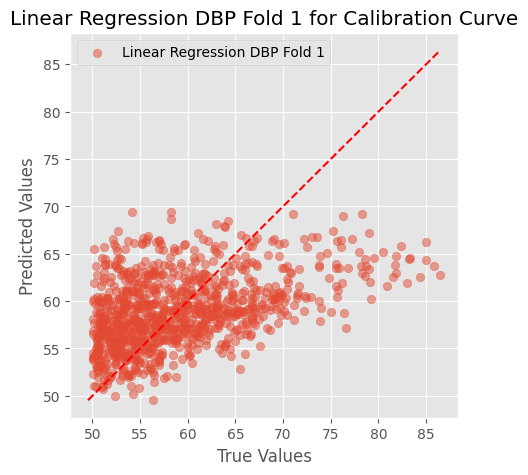

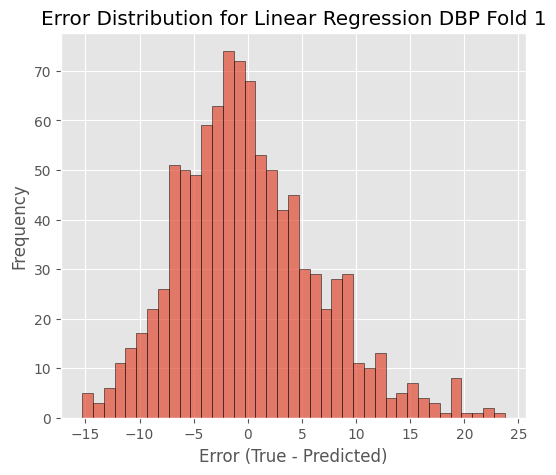

                          Model       R^2       MSE      RMSE       MAE
0  Linear Regression DBP Fold 2  0.255666  42.70364  6.534802  5.061527


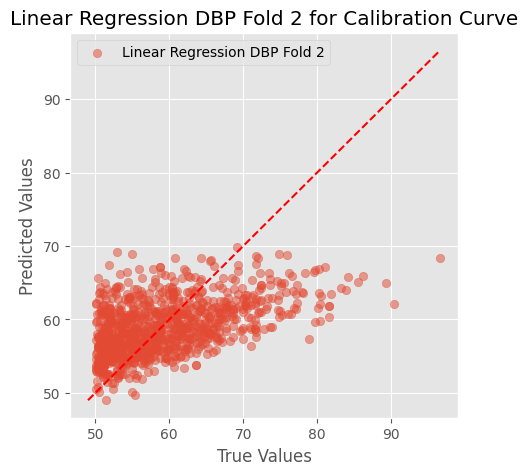

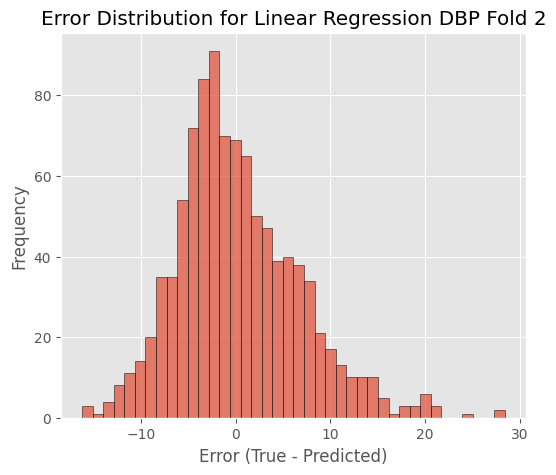

                          Model       R^2        MSE      RMSE      MAE
0  Linear Regression DBP Fold 3  0.225119  40.644913  6.375336  4.97583


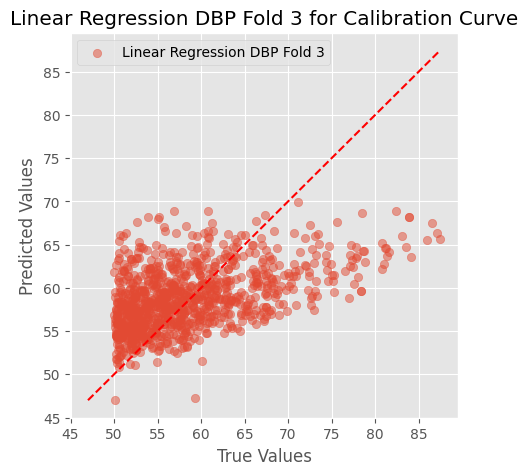

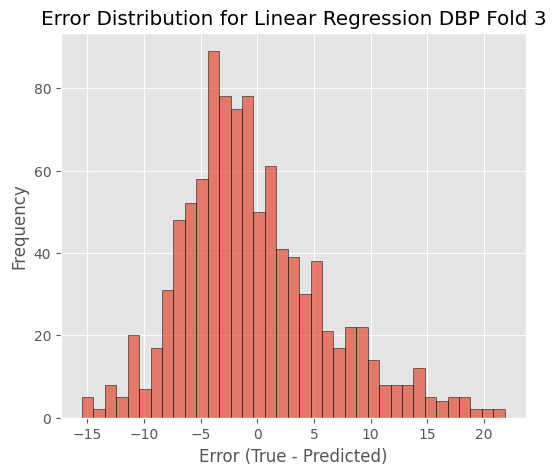

                          Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP Fold 4  0.257869  42.987606  6.556493  4.940625


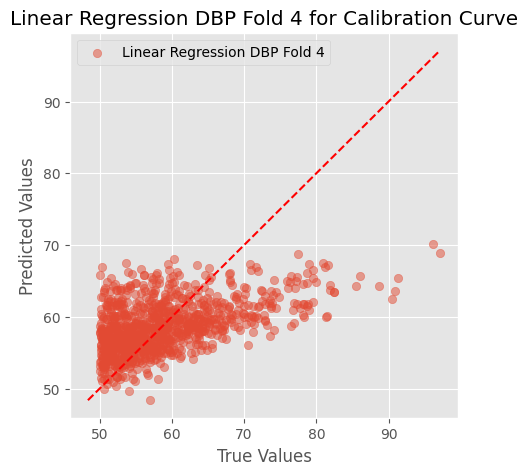

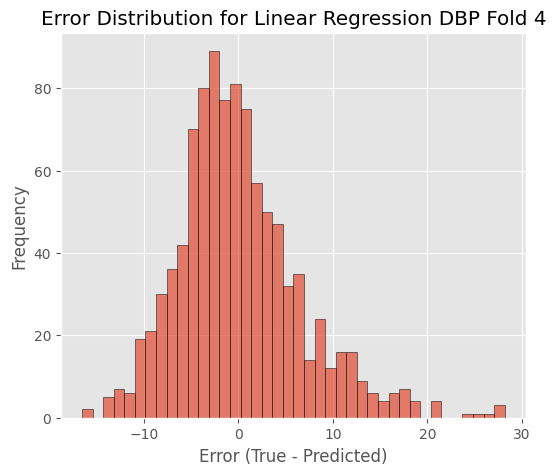

                          Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP Fold 5  0.218016  42.679646  6.532966  5.075153


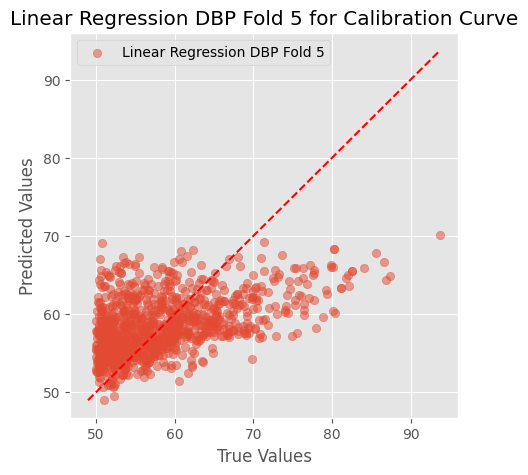

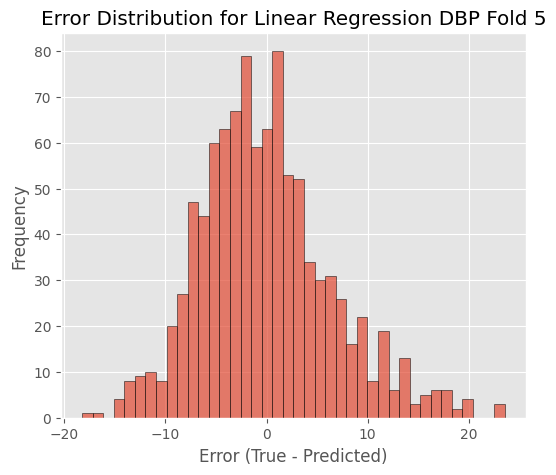


Linear Regression DBP Mean ± Std over 5 folds:
R^2: 0.2286 ± 0.0265
MSE: 42.2118 ± 0.8422
RMSE: 6.4967 ± 0.0652
MAE: 5.0226 ± 0.0540

Linear Regression DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.919e+01%
Percent within 10 mmHg: 8.853e+01%
Percent within 15 mmHg: 9.705e+01%

Linear Regression DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -5.892e-03
Standard Deviation (mmHg): 6.50
Pass/Fail: Pass


In [12]:
from sklearn.linear_model import LinearRegression

if MODELS_TO_TEST["LinearRegression"]:
    # DBP
    cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP")

                          Model       R^2         MSE       RMSE       MAE
0  Linear Regression SBP Fold 1  0.208322  287.427338  16.953682  13.81199


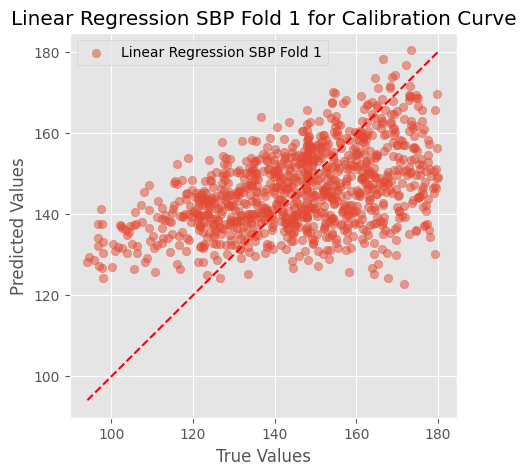

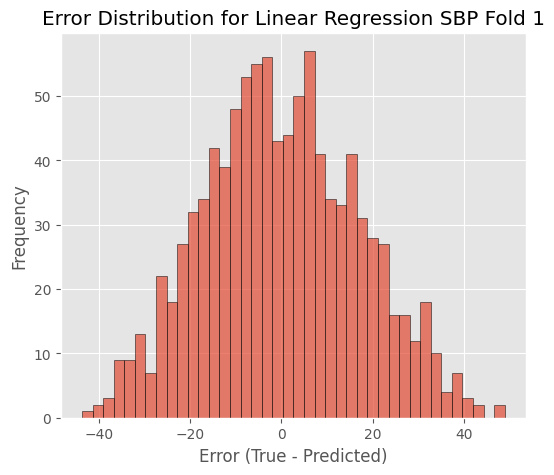

                          Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP Fold 2  0.288968  253.817703  15.931657  12.938572


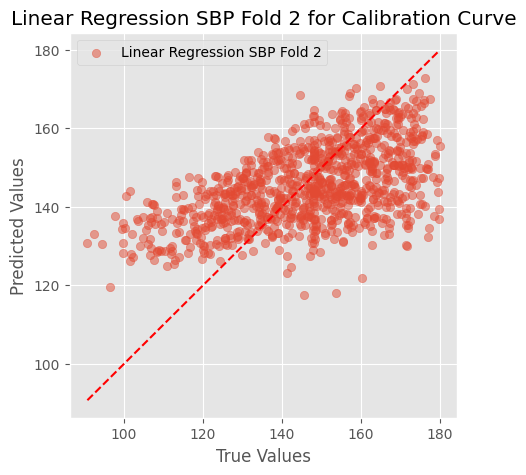

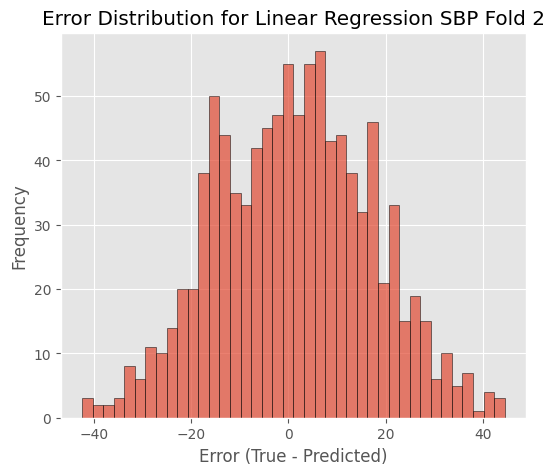

                          Model       R^2         MSE     RMSE        MAE
0  Linear Regression SBP Fold 3  0.288599  269.783936  16.4251  13.261432


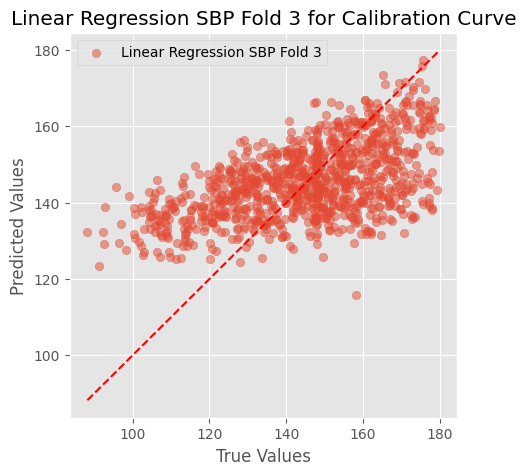

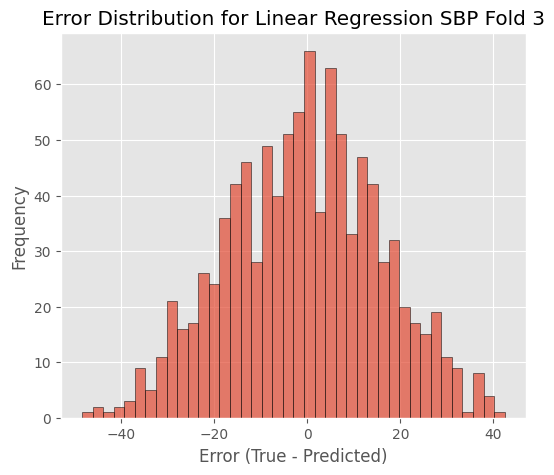

                          Model       R^2         MSE       RMSE       MAE
0  Linear Regression SBP Fold 4  0.220709  279.918121  16.730753  13.44768


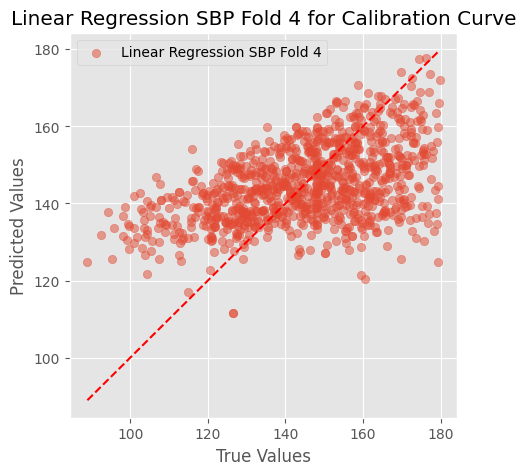

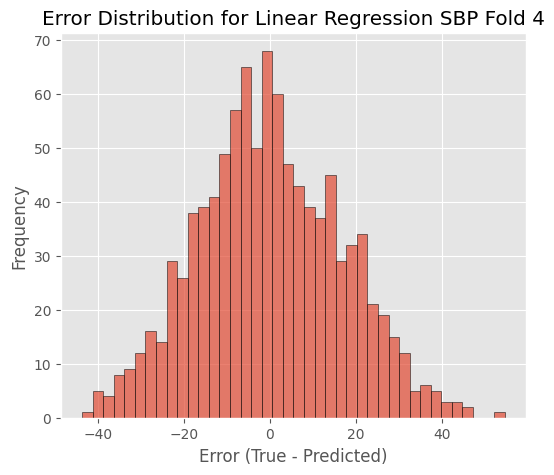

                          Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP Fold 5  0.235755  278.407471  16.685547  13.367614


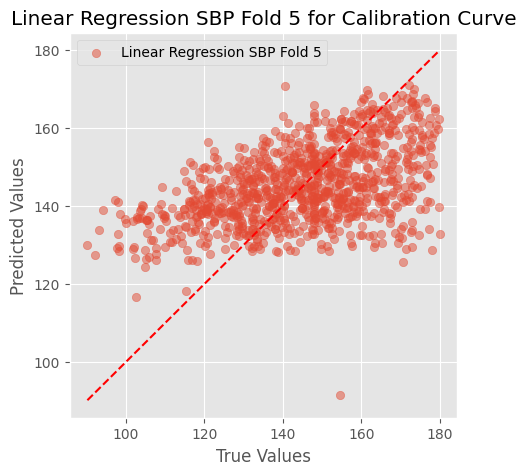

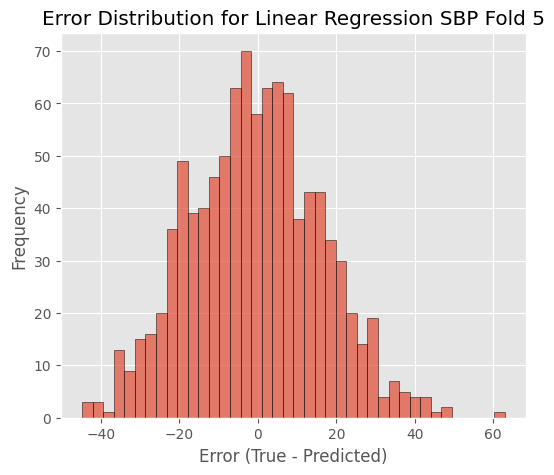


Linear Regression SBP Mean ± Std over 5 folds:
R^2: 0.2485 ± 0.0340
MSE: 273.8709 ± 11.4870
RMSE: 16.5453 ± 0.3498
MAE: 13.3655 ± 0.2826

Linear Regression SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.324e+01%
Percent within 10 mmHg: 4.427e+01%
Percent within 15 mmHg: 6.150e+01%

Linear Regression SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.198e-03
Standard Deviation (mmHg): 16.54
Pass/Fail: Fail


In [13]:
if MODELS_TO_TEST["LinearRegression"]:
    # SBP
    cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP")

## Random Forest Regressor

                      Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP Fold 1  0.250797  38.703446  6.221209  4.670872


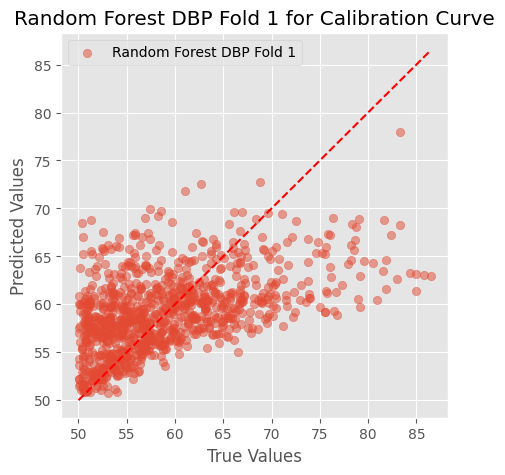

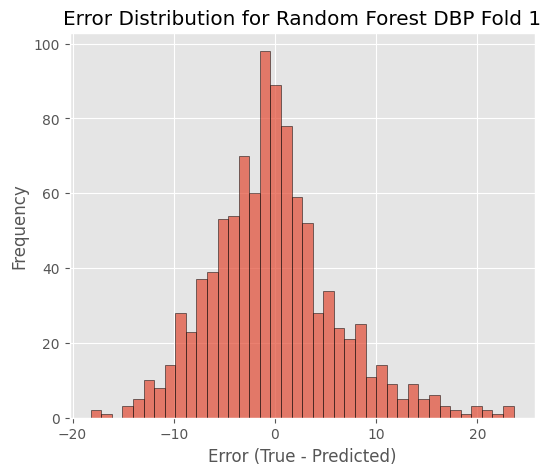

                      Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP Fold 2  0.351682  37.195073  6.098776  4.586636


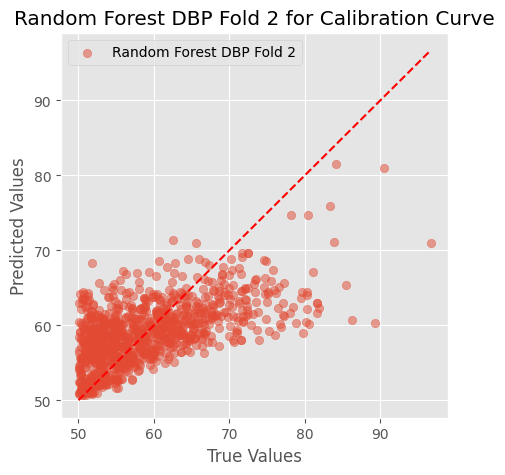

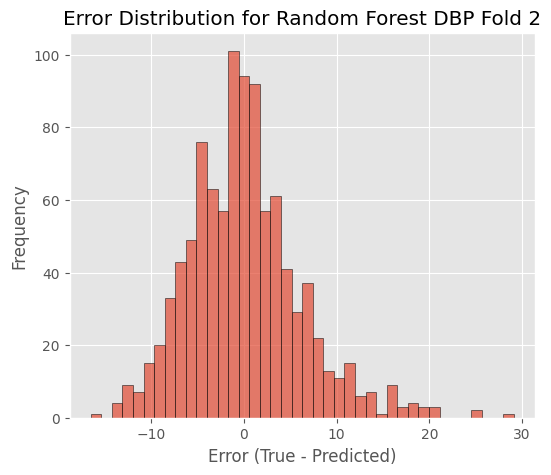

                      Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP Fold 3  0.294863  36.986622  6.081663  4.589306


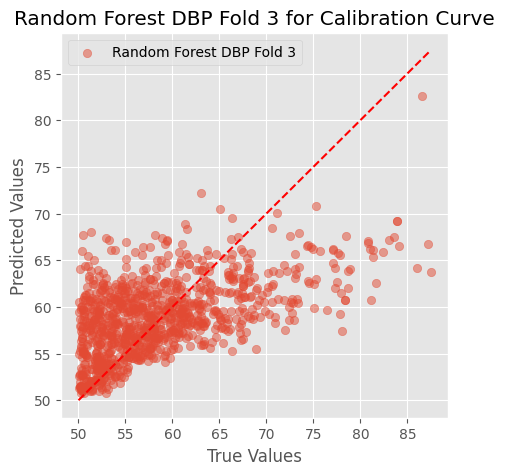

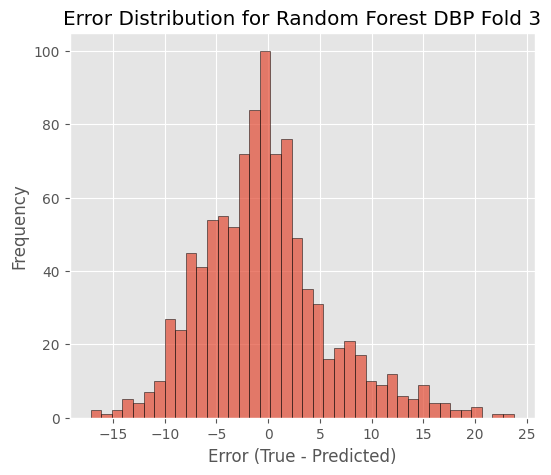

                      Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP Fold 4  0.31185  39.860763  6.313538  4.609019


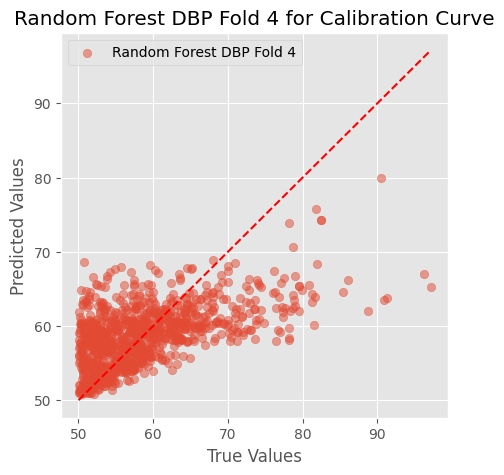

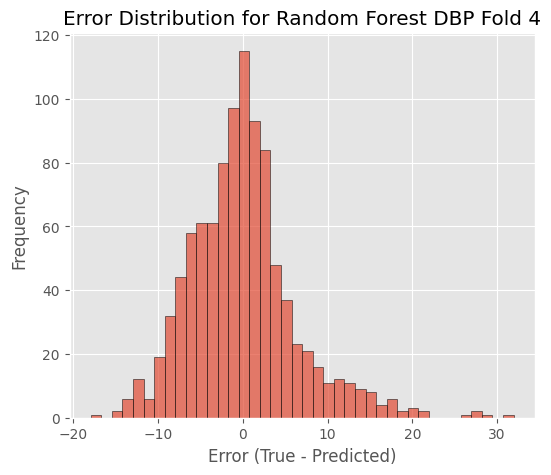

                      Model       R^2        MSE      RMSE     MAE
0  Random Forest DBP Fold 5  0.327607  36.698317  6.057914  4.5288


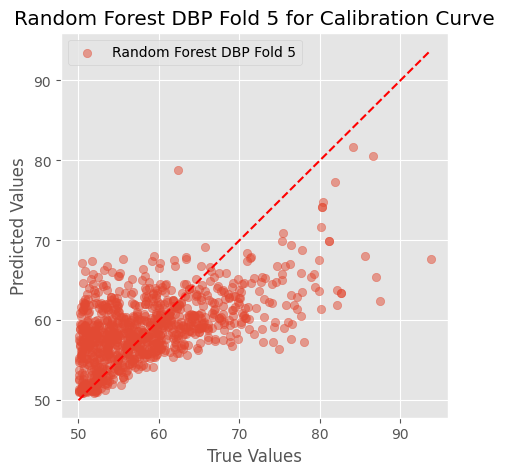

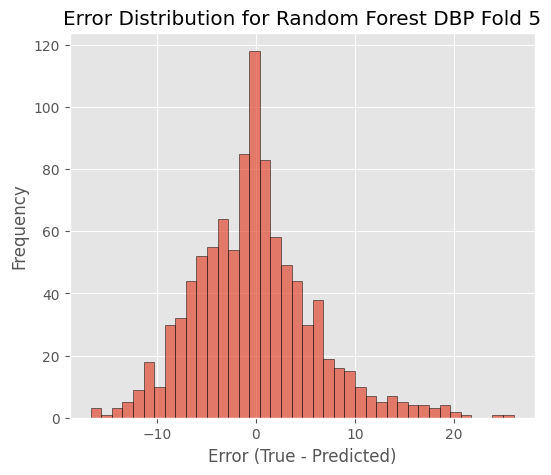


Random Forest DBP Mean ± Std over 5 folds:
R^2: 0.3074 ± 0.0339
MSE: 37.8888 ± 1.2054
RMSE: 6.1546 ± 0.0974
MAE: 4.5969 ± 0.0456

Random Forest DBP BHS Evaluation (Mean over 5 folds):
Grade: A
Percent within 5 mmHg: 6.299e+01%
Percent within 10 mmHg: 9.023e+01%
Percent within 15 mmHg: 9.733e+01%

Random Forest DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -1.518e-01
Standard Deviation (mmHg): 6.15
Pass/Fail: Pass


In [14]:
from sklearn.ensemble import RandomForestRegressor

if MODELS_TO_TEST["RandomForestRegressor"]:
    # DBP
    cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

                      Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP Fold 1  0.396716  219.028877  14.799624  11.434174


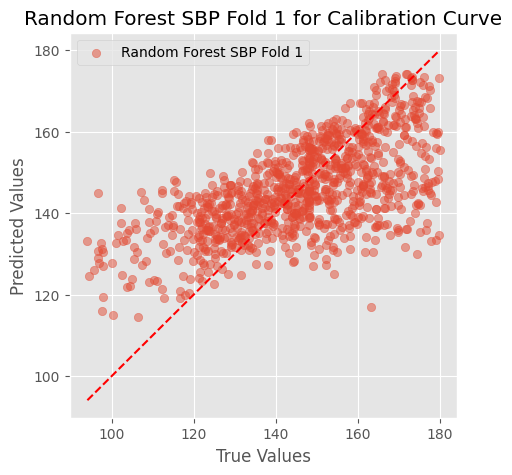

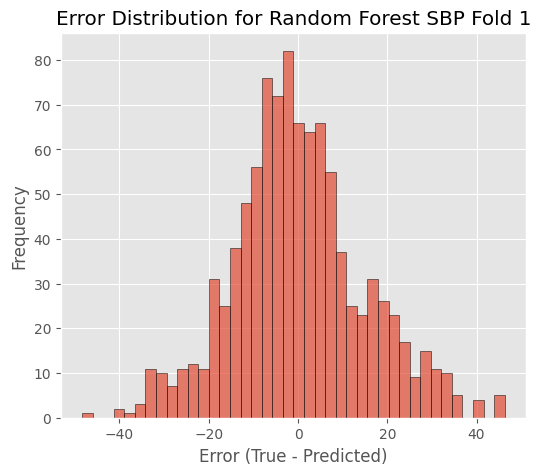

                      Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP Fold 2  0.426112  204.861352  14.312978  11.066167


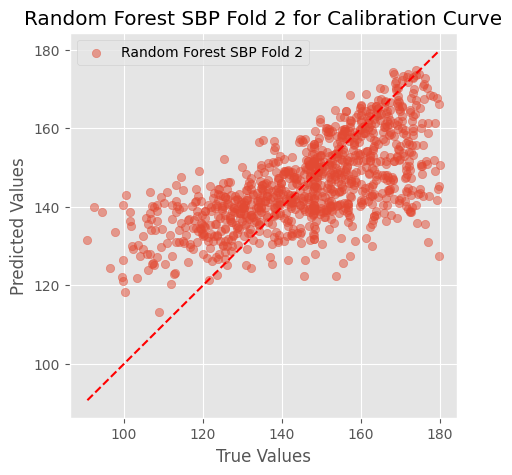

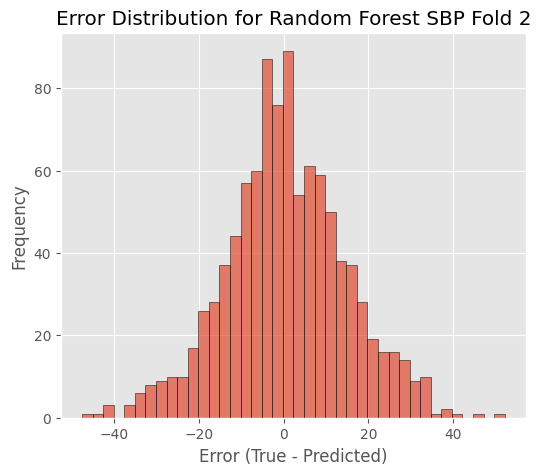

                      Model       R^2         MSE       RMSE       MAE
0  Random Forest SBP Fold 3  0.408292  224.393051  14.979755  11.43533


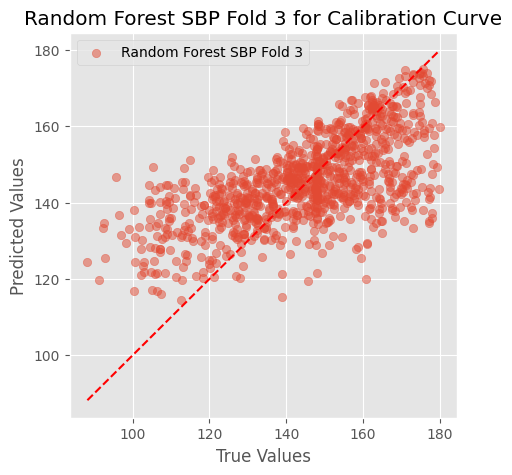

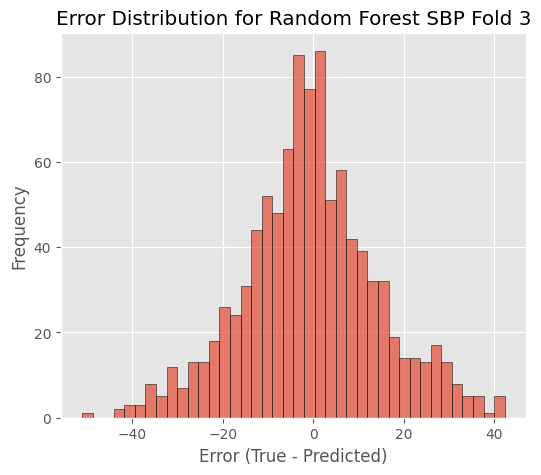

                      Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP Fold 4  0.383956  221.280281  14.875493  11.385153


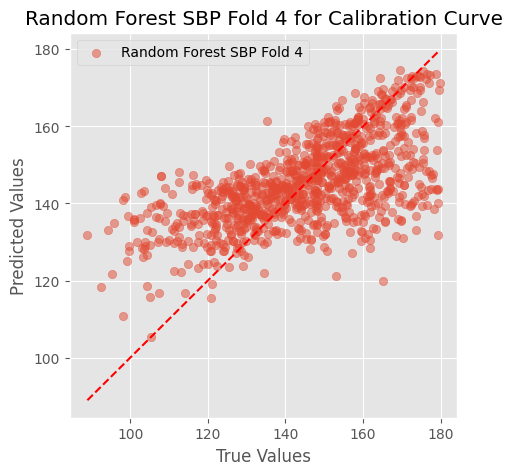

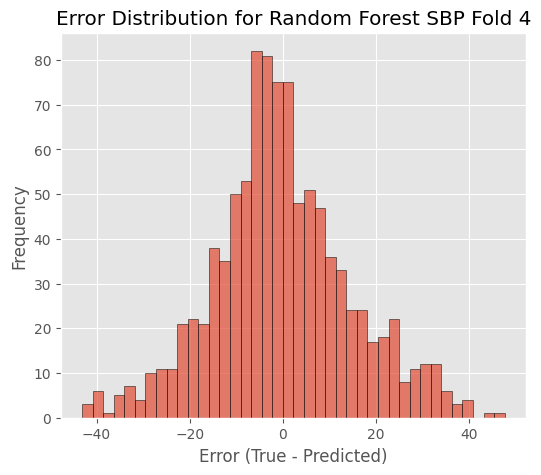

                      Model      R^2         MSE       RMSE       MAE
0  Random Forest SBP Fold 5  0.37854  226.392104  15.046332  11.65591


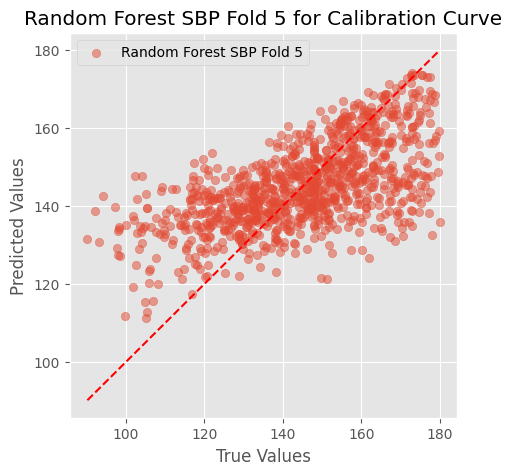

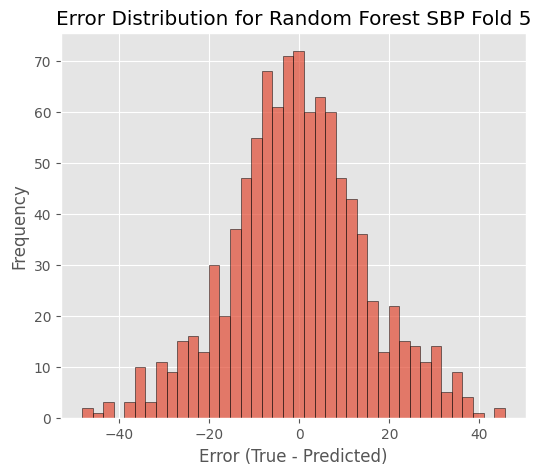


Random Forest SBP Mean ± Std over 5 folds:
R^2: 0.3987 ± 0.0172
MSE: 219.1911 ± 7.5980
RMSE: 14.8028 ± 0.2592
MAE: 11.3953 ± 0.1895

Random Forest SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 3.039e+01%
Percent within 10 mmHg: 5.492e+01%
Percent within 15 mmHg: 7.137e+01%

Random Forest SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -1.242e-01
Standard Deviation (mmHg): 14.80
Pass/Fail: Fail


In [15]:
if MODELS_TO_TEST["RandomForestRegressor"]:
    # SBP
    cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

## XGBoost Regressor

                Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP Fold 1  0.161989  43.291214  6.579606  4.846316


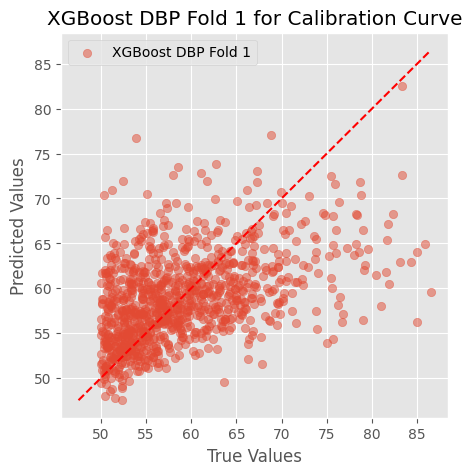

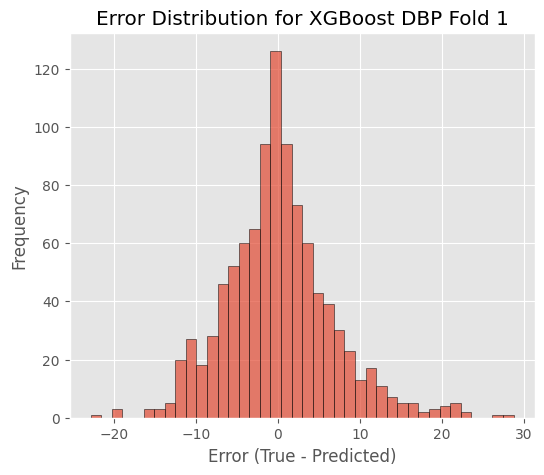

                Model       R^2        MSE      RMSE      MAE
0  XGBoost DBP Fold 2  0.268517  41.966385  6.478147  4.77722


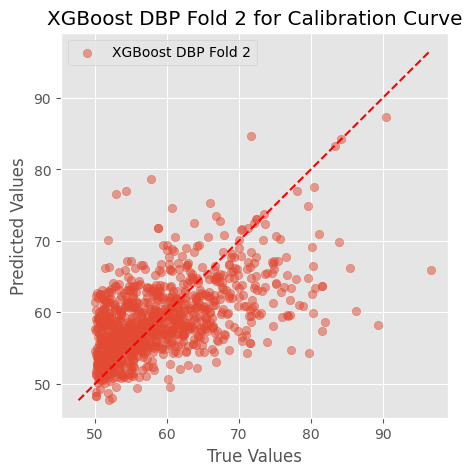

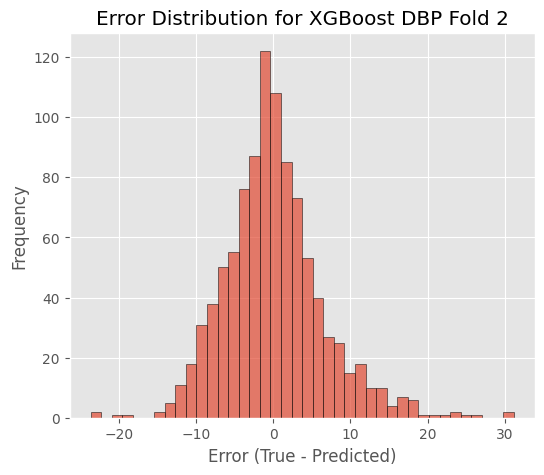

                Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP Fold 3  0.220684  40.877575  6.393557  4.761374


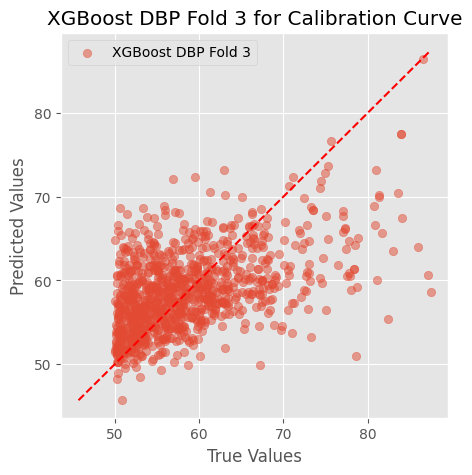

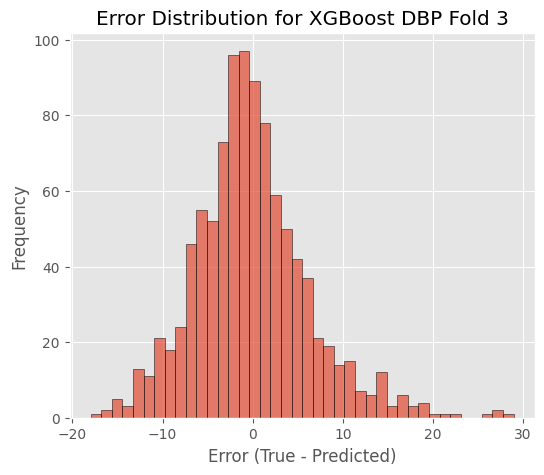

                Model       R^2        MSE     RMSE       MAE
0  XGBoost DBP Fold 4  0.233005  44.427822  6.66542  4.925952


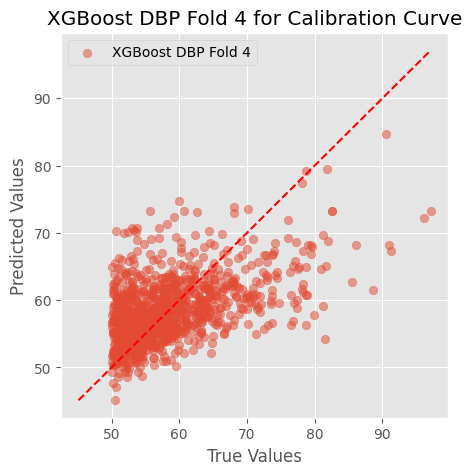

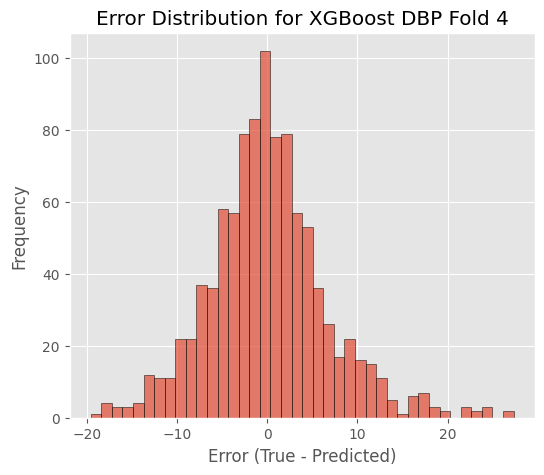

                Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP Fold 5  0.254942  40.664223  6.376851  4.689218


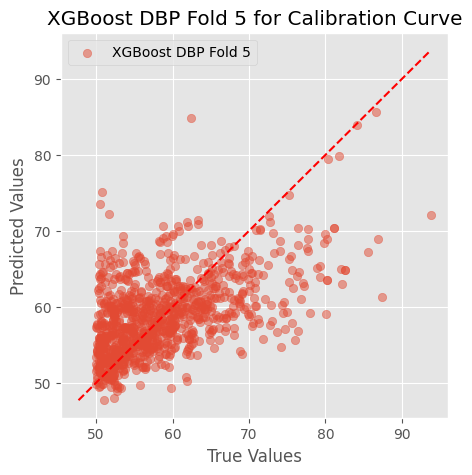

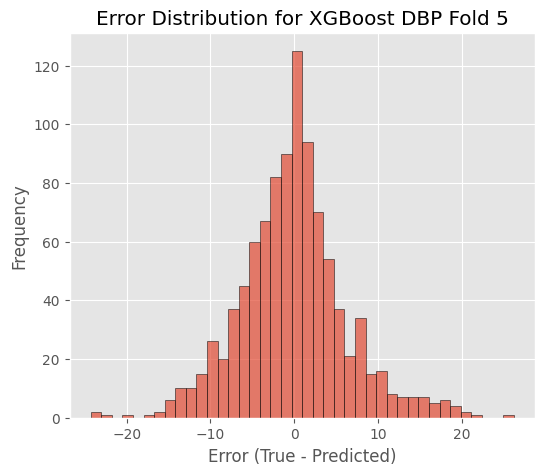


XGBoost DBP Mean ± Std over 5 folds:
R^2: 0.2278 ± 0.0369
MSE: 42.2454 ± 1.4357
RMSE: 6.4987 ± 0.1102
MAE: 4.8000 ± 0.0804

XGBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: A
Percent within 5 mmHg: 6.283e+01%
Percent within 10 mmHg: 8.791e+01%
Percent within 15 mmHg: 9.666e+01%

XGBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 6.689e-03
Standard Deviation (mmHg): 6.50
Pass/Fail: Pass


In [16]:
from xgboost import XGBRegressor

if MODELS_TO_TEST["XGBRegressor"]:
    # DBP
    cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

                Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP Fold 1  0.368764  229.177017  15.138594  11.603973


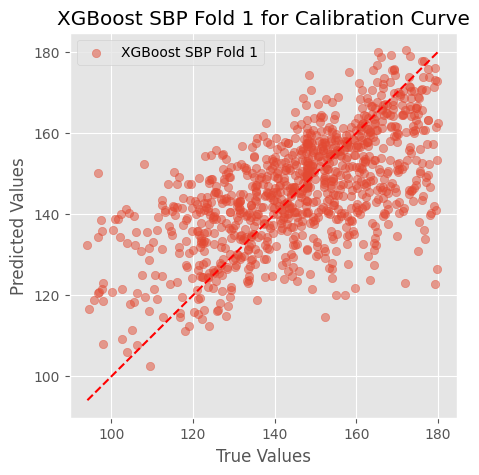

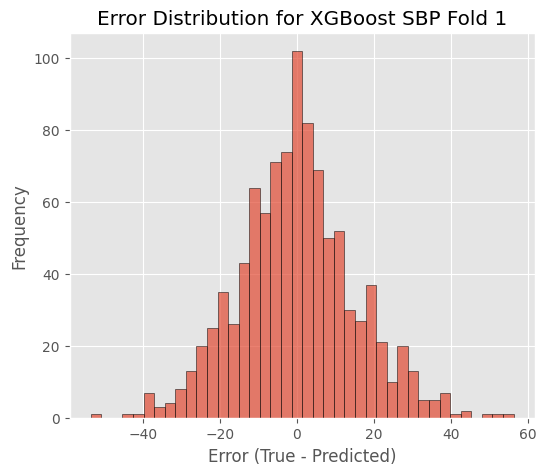

                Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP Fold 2  0.393717  216.425552  14.711409  11.113038


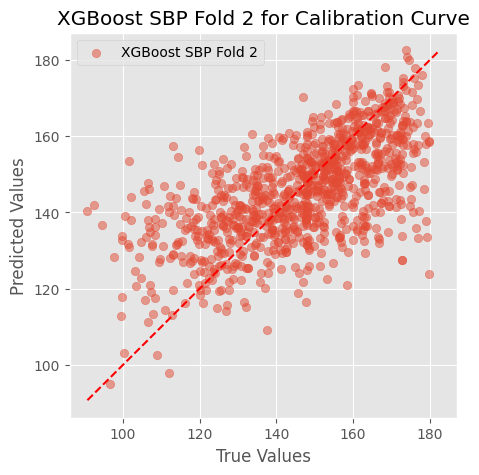

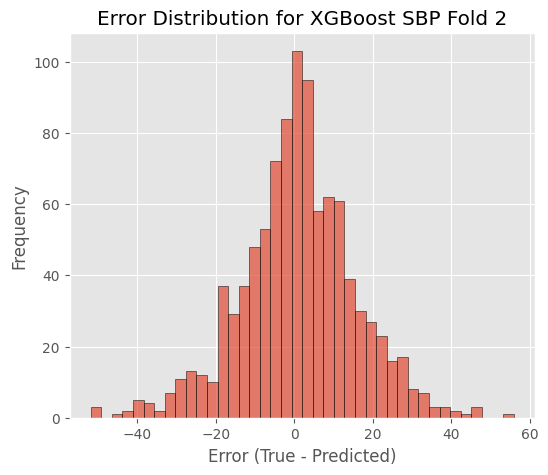

                Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP Fold 3  0.354869  244.652267  15.641364  11.836513


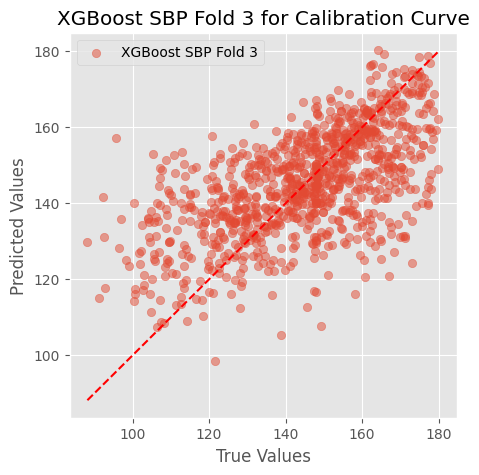

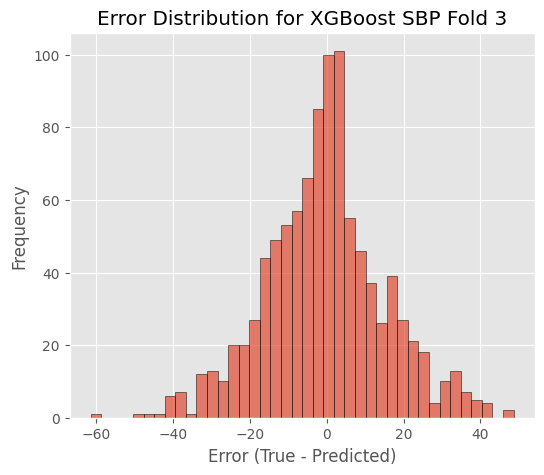

                Model      R^2         MSE       RMSE       MAE
0  XGBoost SBP Fold 4  0.33462  239.001663  15.459679  11.52704


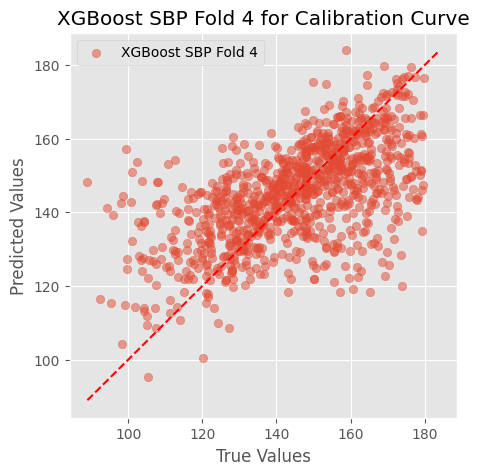

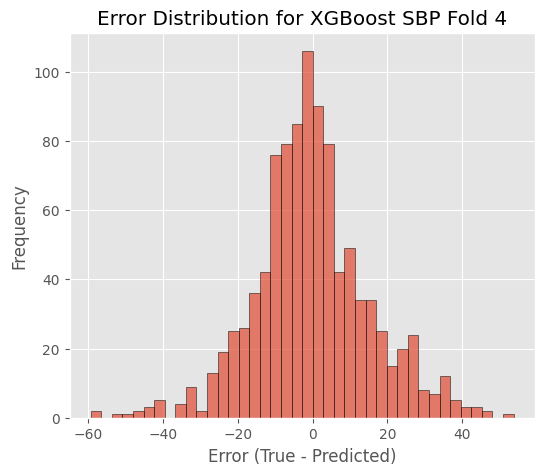

                Model       R^2         MSE       RMSE       MAE
0  XGBoost SBP Fold 5  0.336084  241.858505  15.551801  11.86686


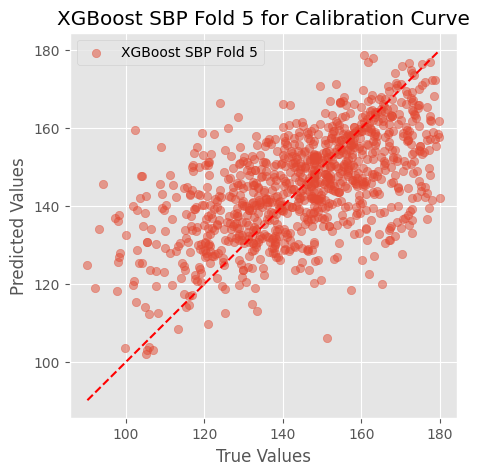

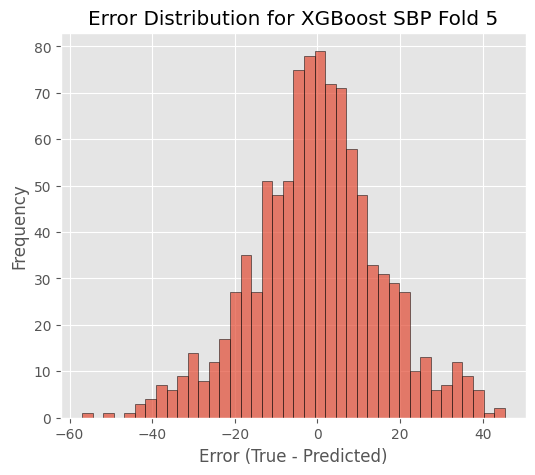


XGBoost SBP Mean ± Std over 5 folds:
R^2: 0.3576 ± 0.0220
MSE: 234.2230 ± 10.3162
RMSE: 15.3006 ± 0.3400
MAE: 11.5895 ± 0.2717

XGBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 3.213e+01%
Percent within 10 mmHg: 5.418e+01%
Percent within 15 mmHg: 7.017e+01%

XGBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.099e-02
Standard Deviation (mmHg): 15.30
Pass/Fail: Fail


In [17]:
if MODELS_TO_TEST["XGBRegressor"]:
    # SBP
    cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

## Support Vector Machine

            Model       R^2        MSE      RMSE       MAE
0  SVM DBP Fold 1 -0.001307  51.727041  7.192151  5.315609


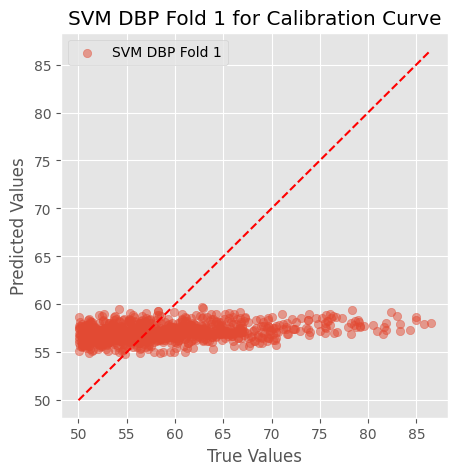

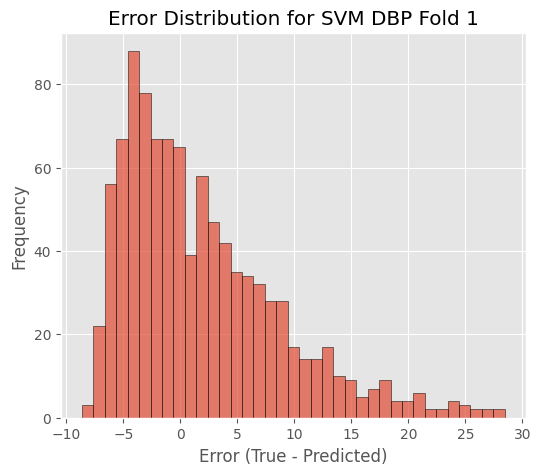

            Model       R^2        MSE      RMSE       MAE
0  SVM DBP Fold 2  0.000409  57.348154  7.572856  5.593956


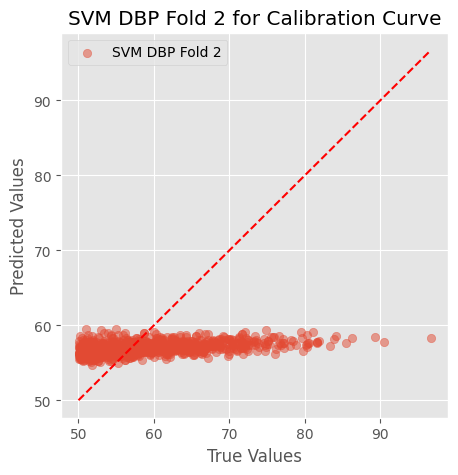

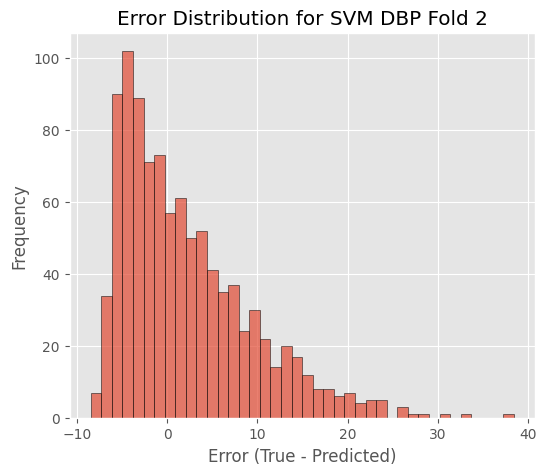

            Model      R^2        MSE      RMSE      MAE
0  SVM DBP Fold 3  0.03024  50.866943  7.132106  5.26091


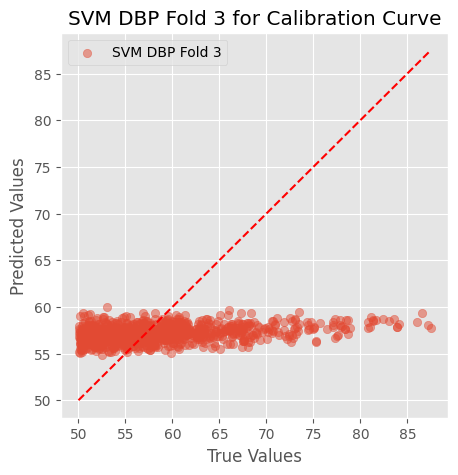

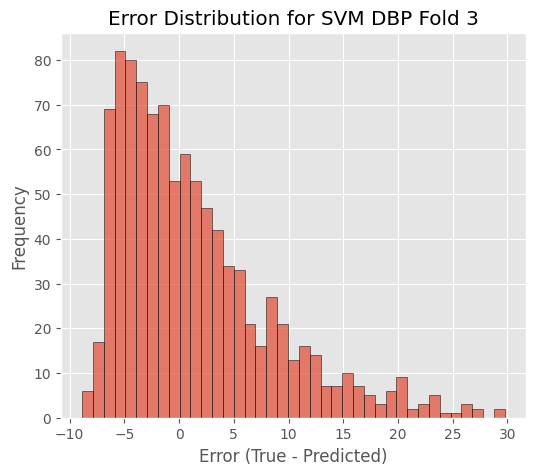

            Model       R^2        MSE      RMSE      MAE
0  SVM DBP Fold 4  0.025518  56.446436  7.513084  5.35631


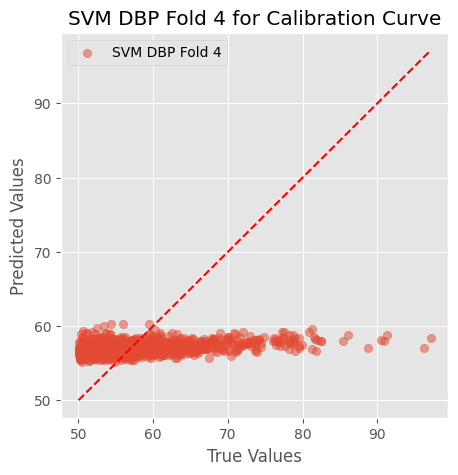

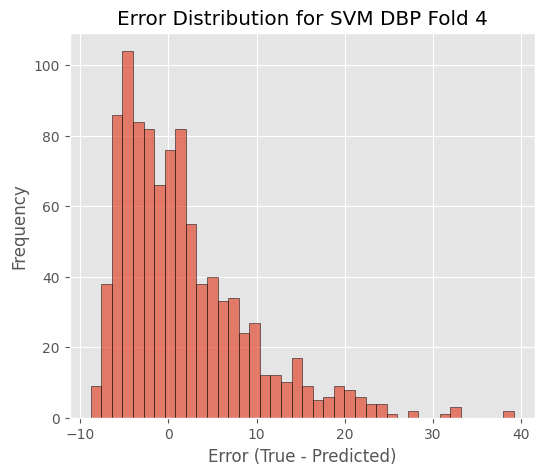

            Model       R^2        MSE     RMSE       MAE
0  SVM DBP Fold 5  0.019685  53.504253  7.31466  5.391343


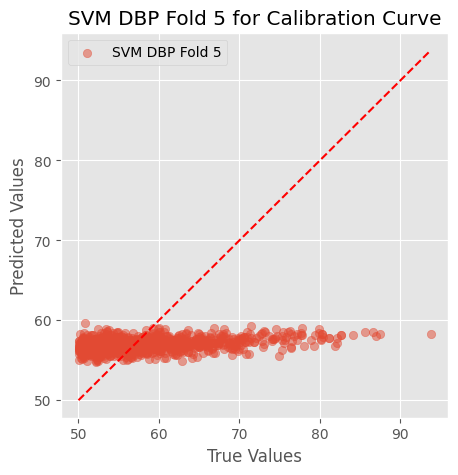

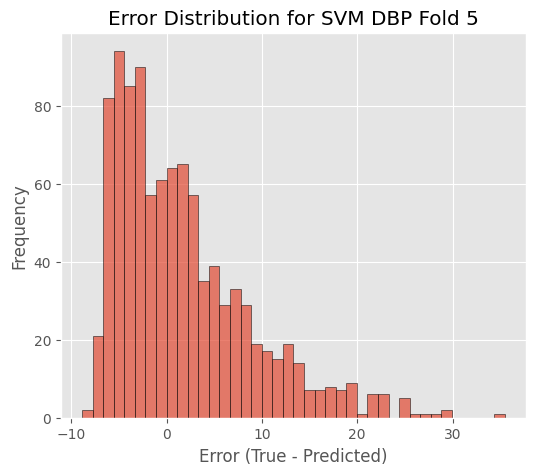


SVM DBP Mean ± Std over 5 folds:
R^2: 0.0149 ± 0.0130
MSE: 53.9786 ± 2.5464
RMSE: 7.3450 ± 0.1731
MAE: 5.3836 ± 0.1138

SVM DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.931e+01%
Percent within 10 mmHg: 8.748e+01%
Percent within 15 mmHg: 9.401e+01%

SVM DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.723e+00
Standard Deviation (mmHg): 7.14
Pass/Fail: Pass


In [18]:
from sklearn.svm import SVR

if MODELS_TO_TEST["SupportVectorRegressor"]:
    # DBP
    cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

            Model       R^2         MSE      RMSE       MAE
0  SVM SBP Fold 1  0.024667  354.105475  18.81769  15.31574


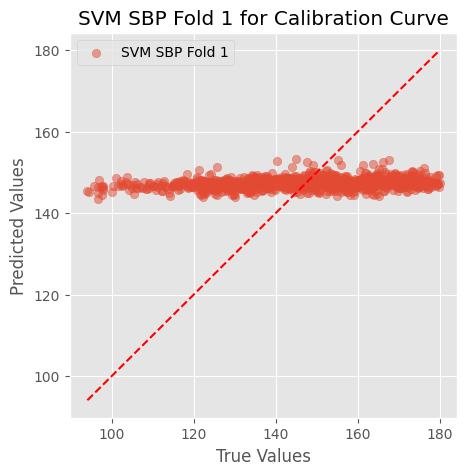

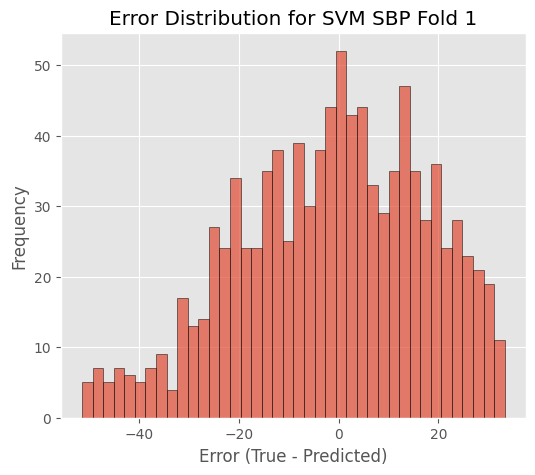

            Model      R^2         MSE       RMSE        MAE
0  SVM SBP Fold 2  0.03672  343.862989  18.543543  15.171755


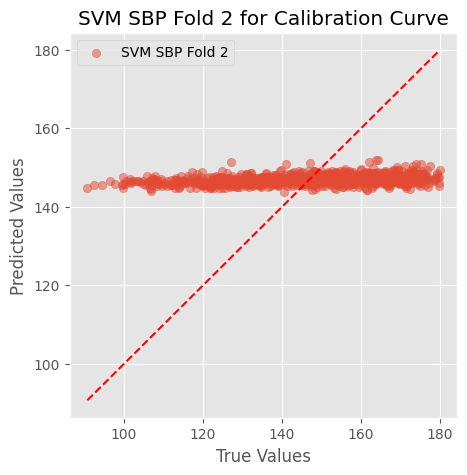

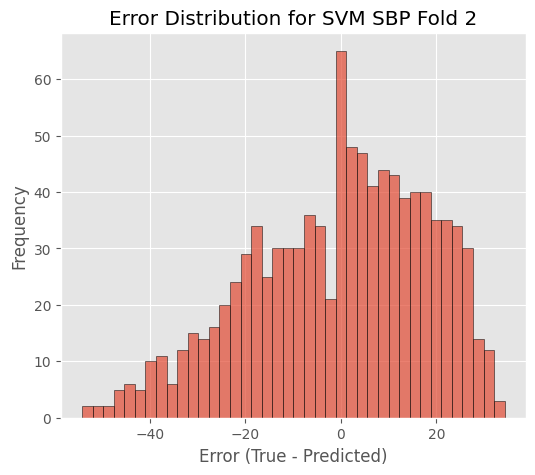

            Model       R^2         MSE      RMSE        MAE
0  SVM SBP Fold 3  0.013635  374.058421  19.34059  15.505967


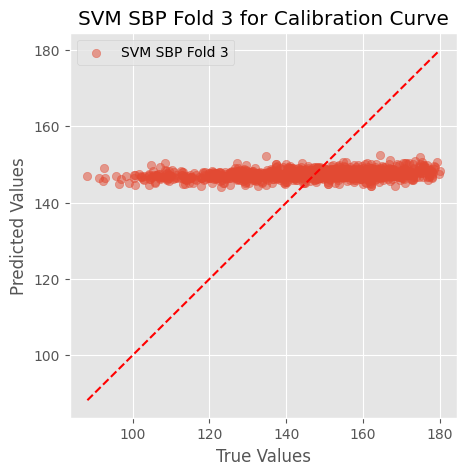

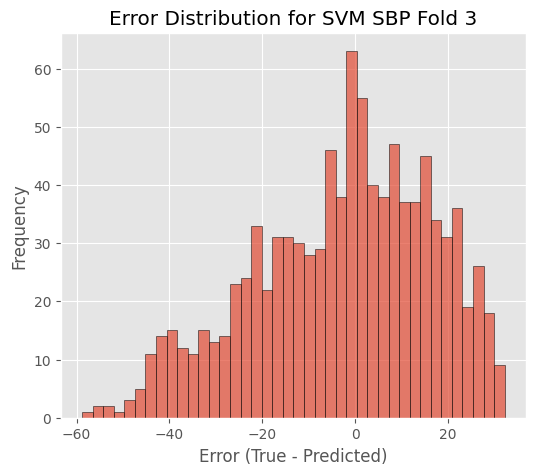

            Model      R^2         MSE       RMSE       MAE
0  SVM SBP Fold 4  0.01646  353.283346  18.795833  15.19767


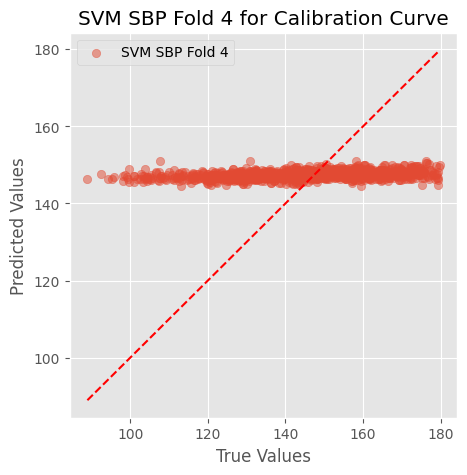

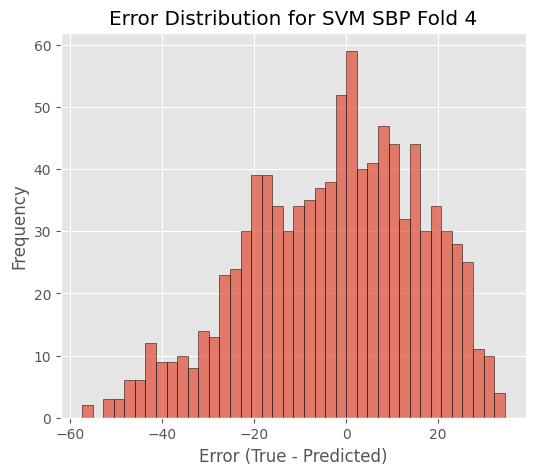

            Model       R^2         MSE       RMSE        MAE
0  SVM SBP Fold 5  0.011921  359.947938  18.972294  15.368931


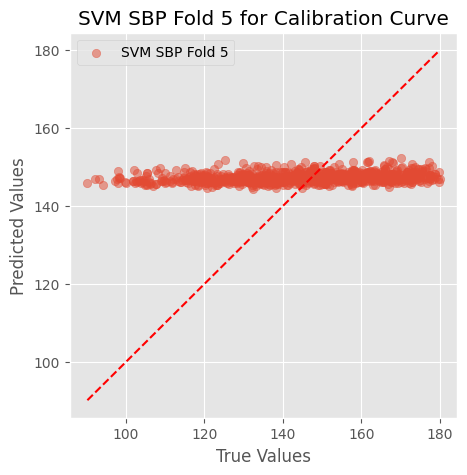

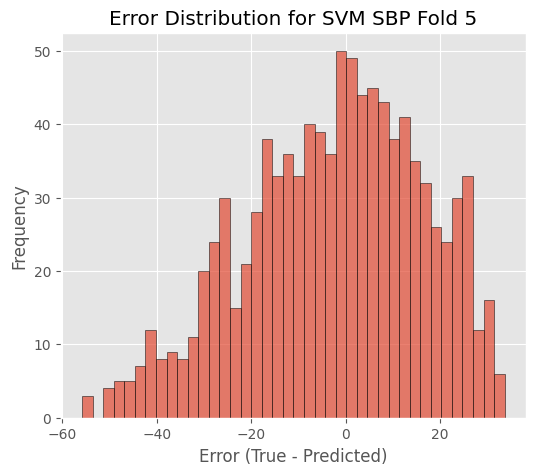


SVM SBP Mean ± Std over 5 folds:
R^2: 0.0207 ± 0.0091
MSE: 357.0516 ± 9.9442
RMSE: 18.8940 ± 0.2622
MAE: 15.3120 ± 0.1213

SVM SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.047e+01%
Percent within 10 mmHg: 3.778e+01%
Percent within 15 mmHg: 5.383e+01%

SVM SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -1.925e+00
Standard Deviation (mmHg): 18.79
Pass/Fail: Fail


In [19]:
if MODELS_TO_TEST["SupportVectorRegressor"]:
    # SBP
    cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

## CatBoost

                 Model      R^2        MSE      RMSE       MAE
0  CatBoost DBP Fold 1  0.24833  38.830905  6.231445  4.688811


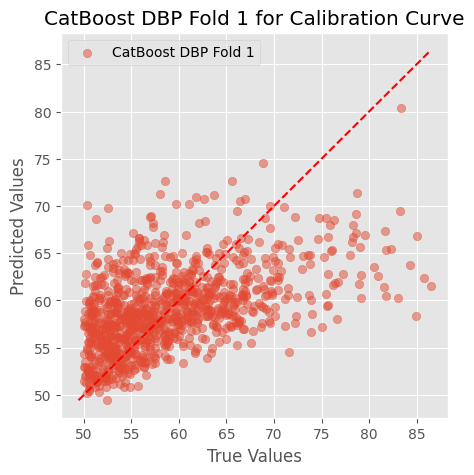

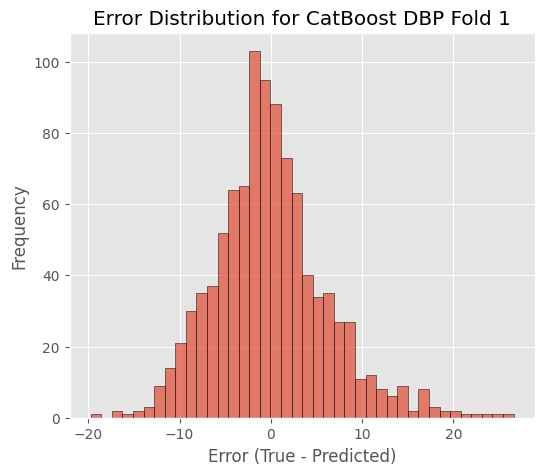

                 Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP Fold 2  0.329787  38.451239  6.200906  4.647465


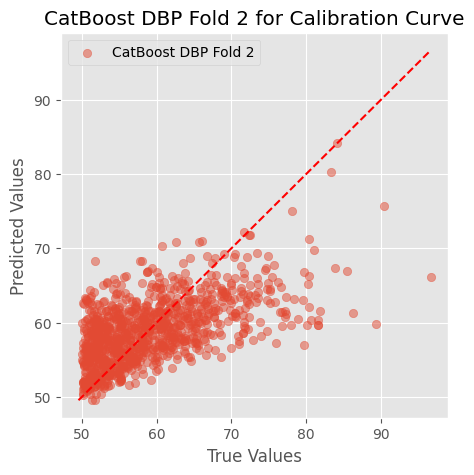

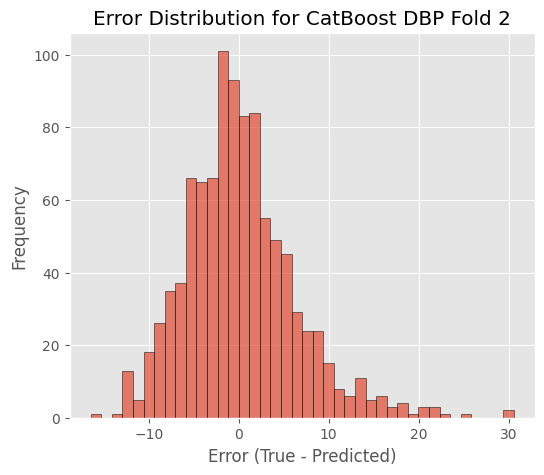

                 Model       R^2        MSE     RMSE       MAE
0  CatBoost DBP Fold 3  0.295159  36.971141  6.08039  4.607187


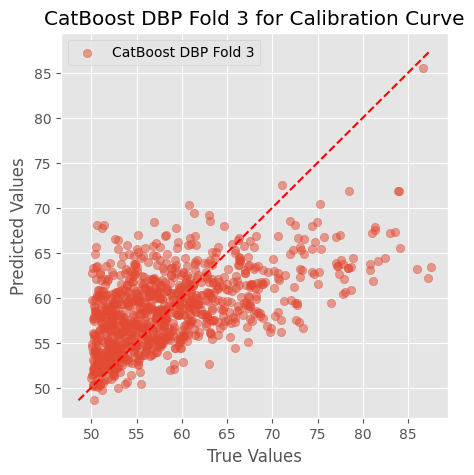

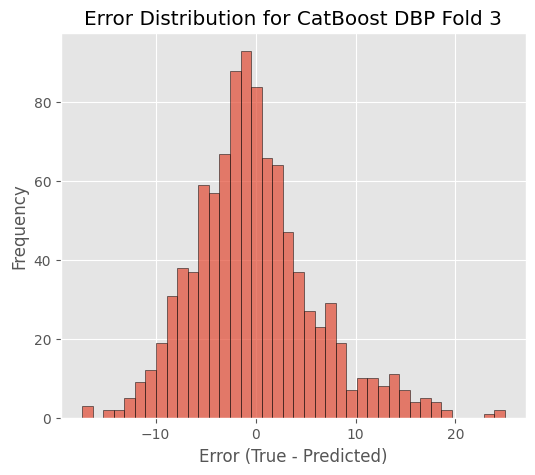

                 Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP Fold 4  0.310708  39.926917  6.318775  4.627864


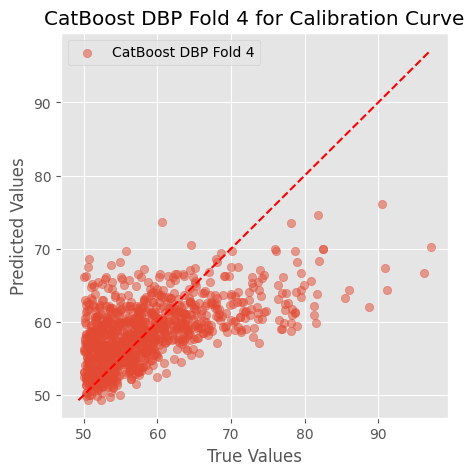

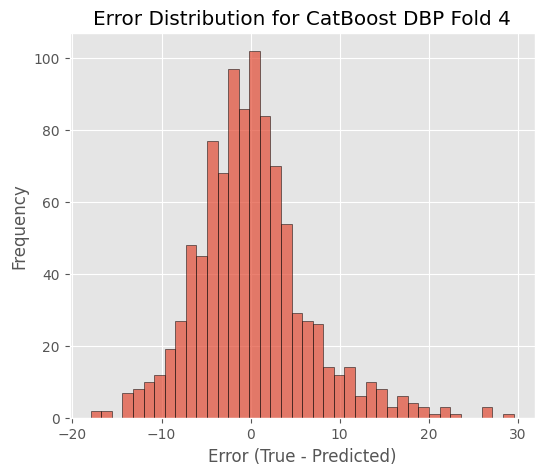

                 Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP Fold 5  0.308306  37.751743  6.144245  4.652612


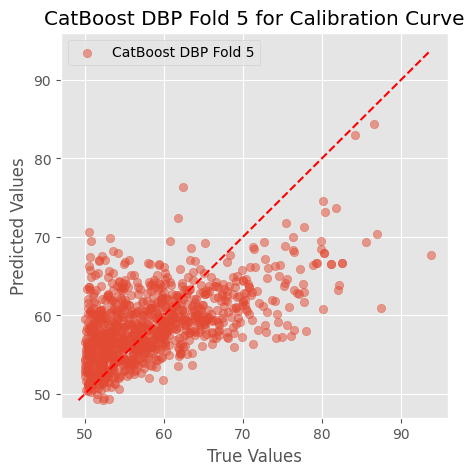

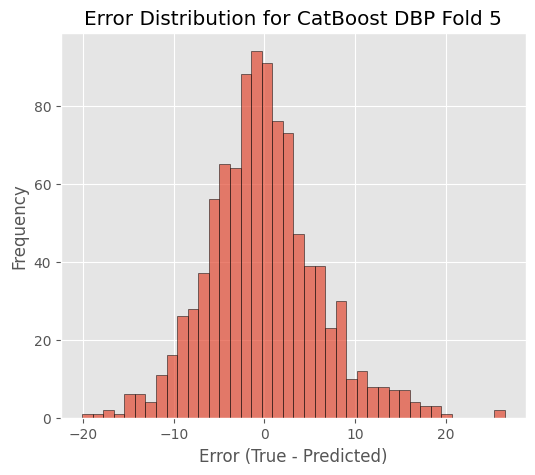


CatBoost DBP Mean ± Std over 5 folds:
R^2: 0.2985 ± 0.0274
MSE: 38.3864 ± 0.9981
RMSE: 6.1952 ± 0.0805
MAE: 4.6448 ± 0.0272

CatBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: A
Percent within 5 mmHg: 6.374e+01%
Percent within 10 mmHg: 9.011e+01%
Percent within 15 mmHg: 9.715e+01%

CatBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -1.511e-02
Standard Deviation (mmHg): 6.20
Pass/Fail: Pass


In [20]:
from catboost import CatBoostRegressor

if MODELS_TO_TEST["CatBoostRegressor"]:
    # DBP
    cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

                 Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP Fold 1  0.416048  212.009999  14.560563  11.249931


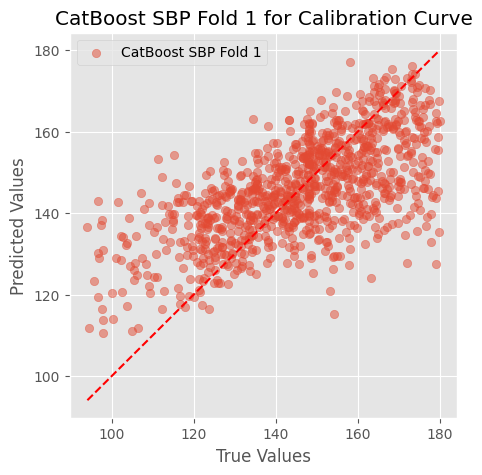

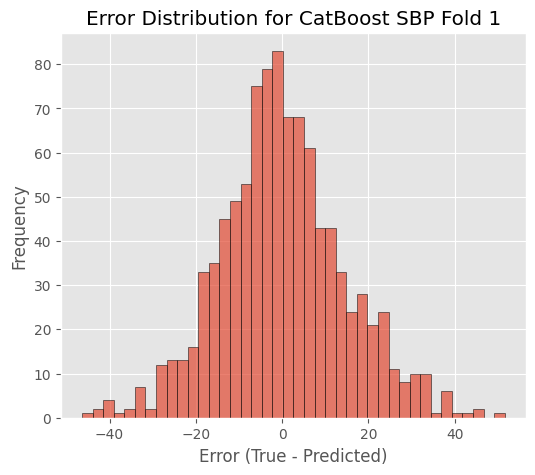

                 Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP Fold 2  0.462932  191.717644  13.846214  10.610683


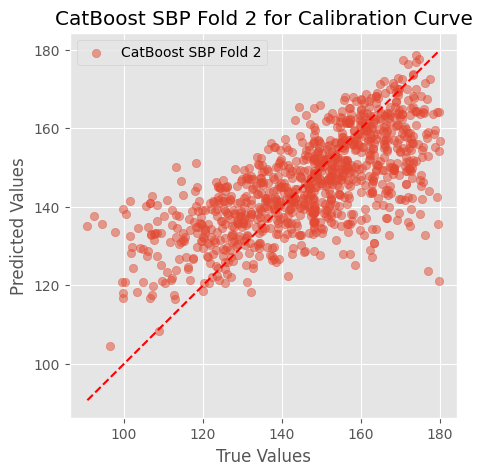

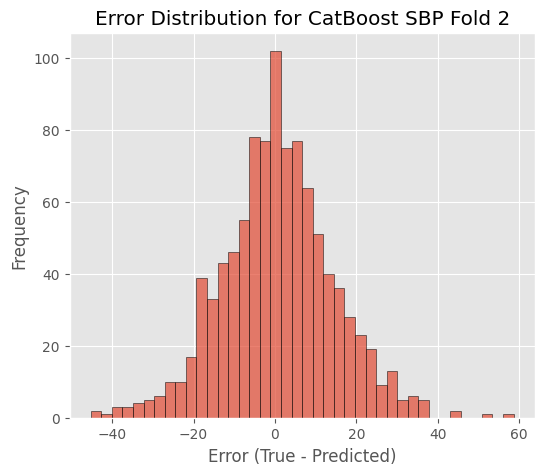

                 Model       R^2        MSE       RMSE        MAE
0  CatBoost SBP Fold 3  0.462337  203.89729  14.279261  10.987147


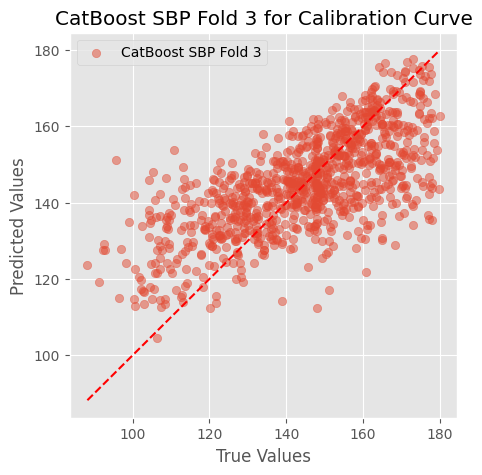

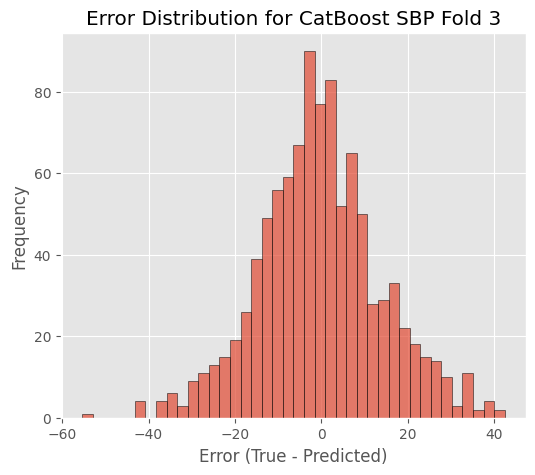

                 Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP Fold 4  0.427176  205.755869  14.344193  10.888192


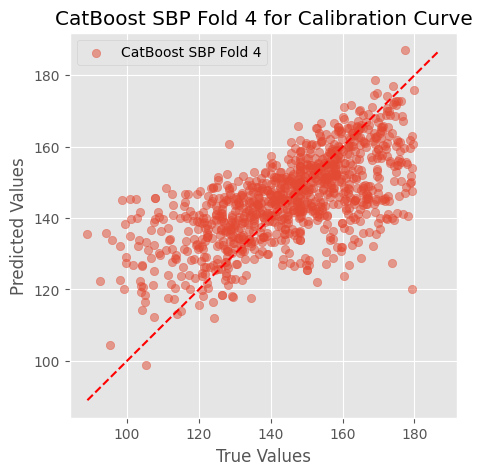

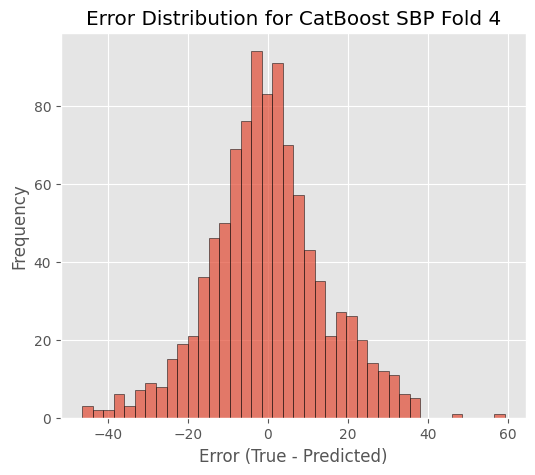

                 Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP Fold 5  0.406629  216.159583  14.702367  11.256931


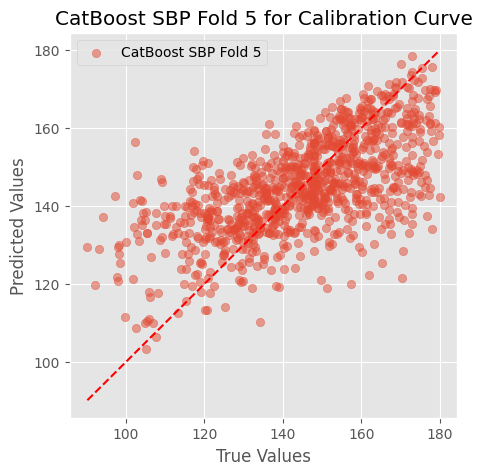

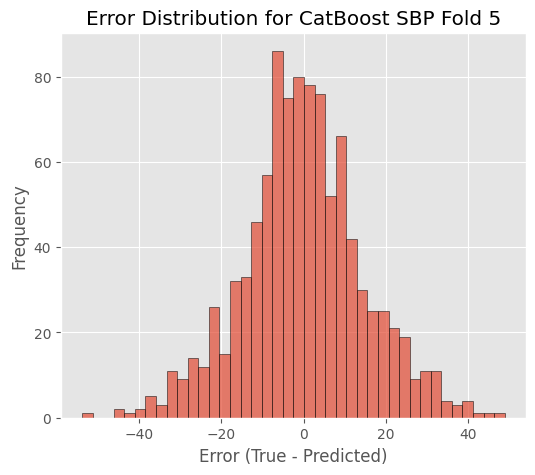


CatBoost SBP Mean ± Std over 5 folds:
R^2: 0.4350 ± 0.0235
MSE: 205.9081 ± 8.3398
RMSE: 14.3465 ± 0.2923
MAE: 10.9986 ± 0.2420

CatBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 3.205e+01%
Percent within 10 mmHg: 5.626e+01%
Percent within 15 mmHg: 7.264e+01%

CatBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 8.504e-03
Standard Deviation (mmHg): 14.35
Pass/Fail: Fail


In [21]:
if MODELS_TO_TEST["CatBoostRegressor"]:
    # SBP
    cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})

## Multilayer Perceptron Regressor

In [22]:
MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 400

            Model       R^2        MSE      RMSE       MAE
0  MLP DBP Fold 1  0.120246  45.447636  6.741486  5.276037


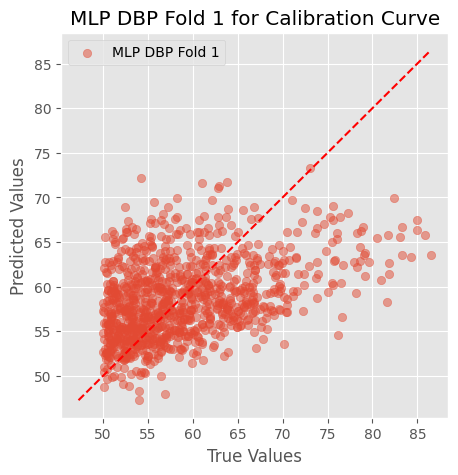

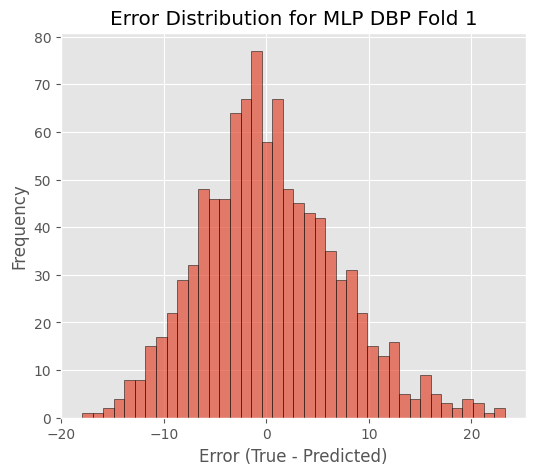

            Model     R^2        MSE      RMSE       MAE
0  MLP DBP Fold 2  0.1121  50.940273  7.137246  5.269961


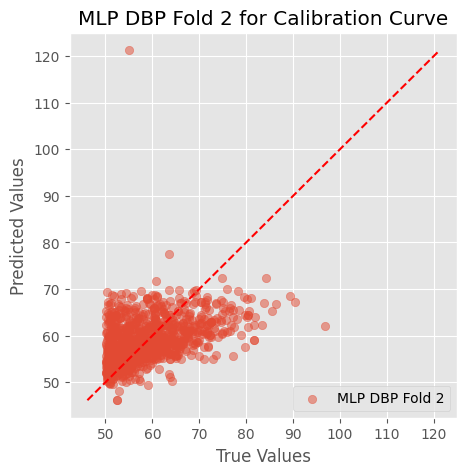

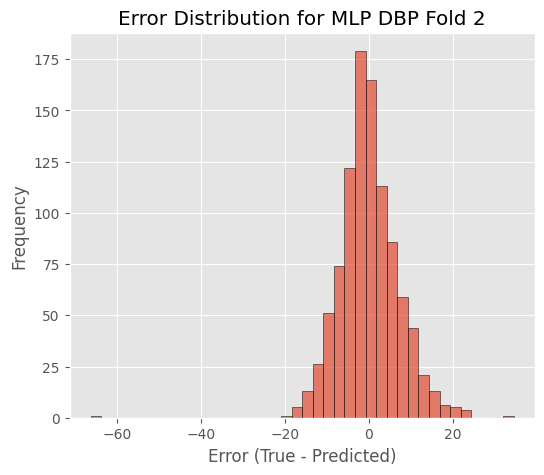

            Model       R^2        MSE      RMSE       MAE
0  MLP DBP Fold 3  0.146846  44.750584  6.689588  5.135672


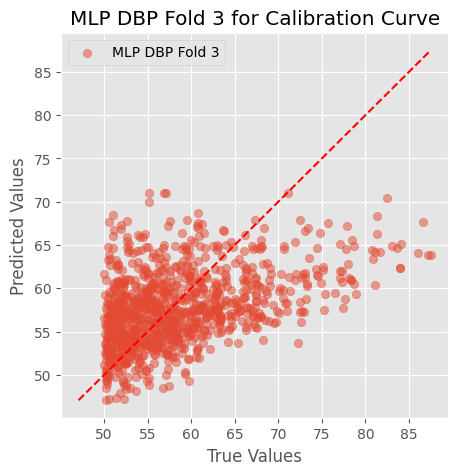

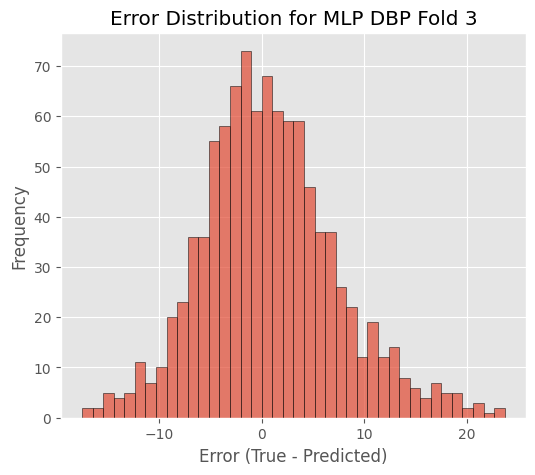

            Model       R^2        MSE      RMSE       MAE
0  MLP DBP Fold 4  0.182578  47.348801  6.881046  5.313734


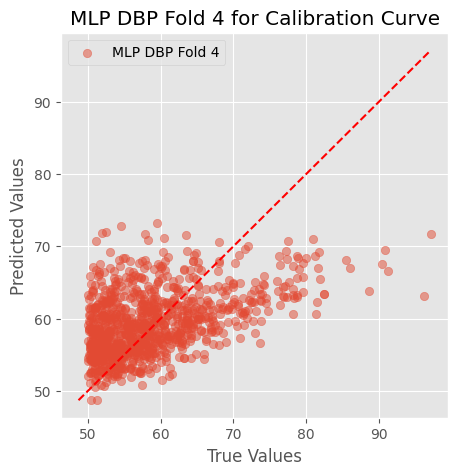

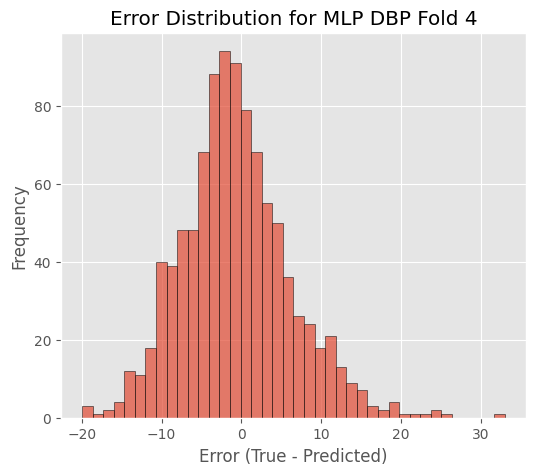

            Model       R^2        MSE      RMSE      MAE
0  MLP DBP Fold 5  0.099248  49.161808  7.011548  5.29739


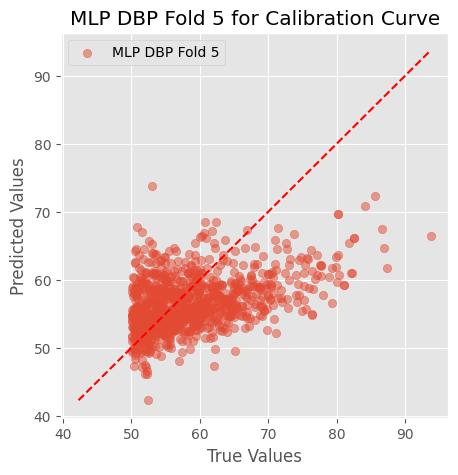

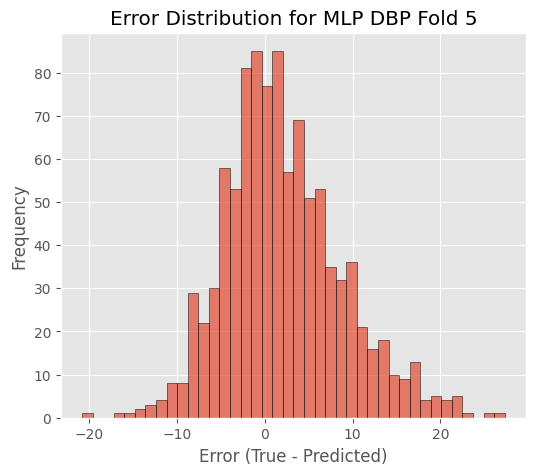


MLP DBP Mean ± Std over 5 folds:
R^2: 0.1322 ± 0.0296
MSE: 47.5298 ± 2.2973
RMSE: 6.8922 ± 0.1662
MAE: 5.2586 ± 0.0634

MLP DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.794e+01%
Percent within 10 mmHg: 8.609e+01%
Percent within 15 mmHg: 9.620e+01%

MLP DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 5.111e-01
Standard Deviation (mmHg): 6.81
Pass/Fail: Pass


In [23]:
from sklearn.neural_network import MLPRegressor

if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # DBP
    cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

            Model       R^2         MSE       RMSE        MAE
0  MLP SBP Fold 1  0.206422  288.117096  16.974012  13.784893


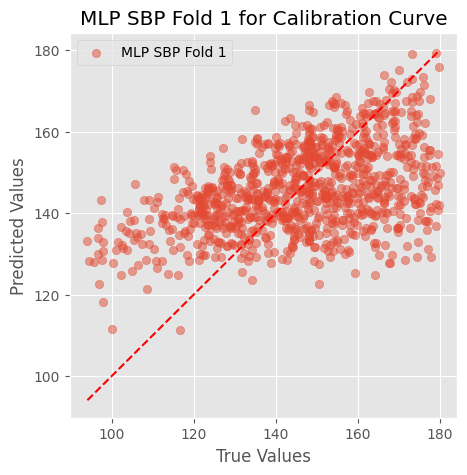

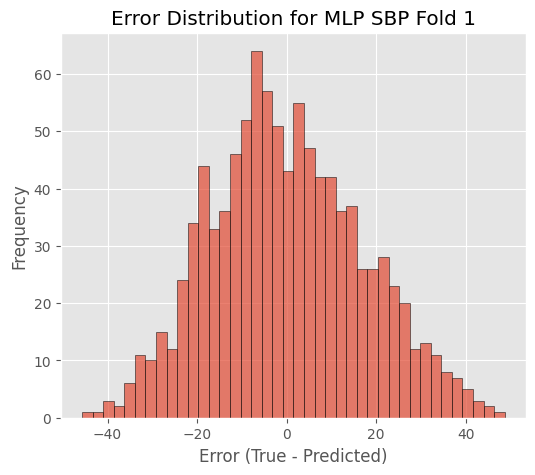

            Model       R^2         MSE       RMSE       MAE
0  MLP SBP Fold 2  0.107291  318.671326  17.851368  13.56424


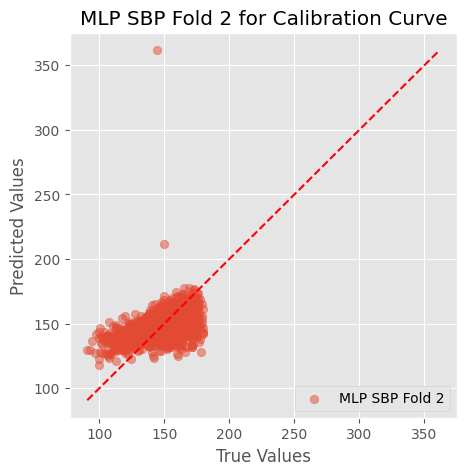

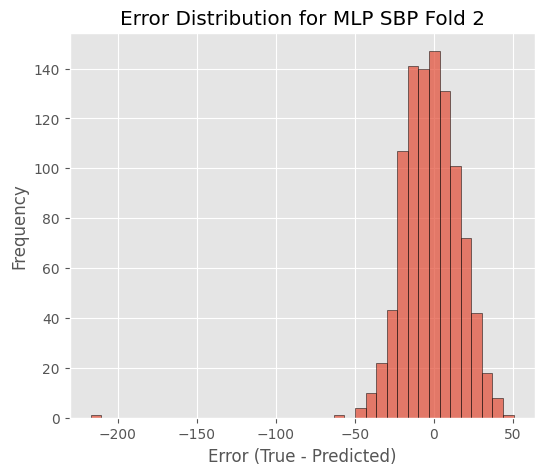

            Model       R^2         MSE       RMSE        MAE
0  MLP SBP Fold 3  0.255078  282.496216  16.807623  13.510366


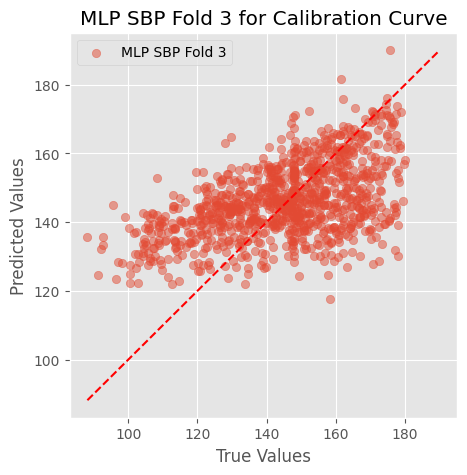

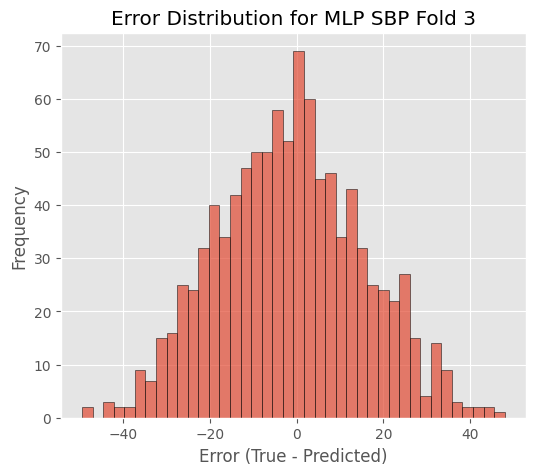

            Model       R^2         MSE       RMSE        MAE
0  MLP SBP Fold 4  0.203152  286.224518  16.918171  13.584805


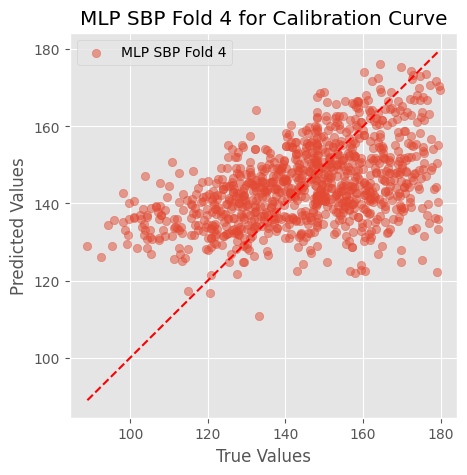

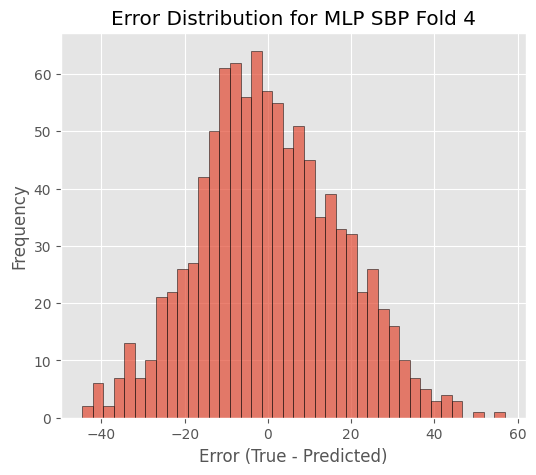

            Model       R^2         MSE       RMSE        MAE
0  MLP SBP Fold 5  0.202291  290.597992  17.046934  13.658987


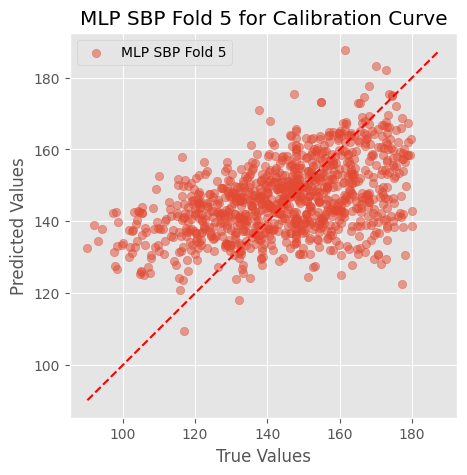

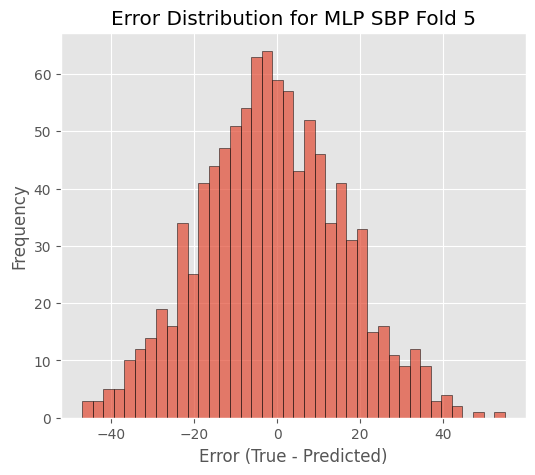


MLP SBP Mean ± Std over 5 folds:
R^2: 0.1948 ± 0.0481
MSE: 293.2214 ± 12.9971
RMSE: 17.1196 ± 0.3741
MAE: 13.6207 ± 0.0949

MLP SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.277e+01%
Percent within 10 mmHg: 4.348e+01%
Percent within 15 mmHg: 6.135e+01%

MLP SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -7.996e-01
Standard Deviation (mmHg): 17.09
Pass/Fail: Fail


In [24]:
if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # SBP
    cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

### Multilayer Perceptron w/ Scaled X and Y

                      Model       R^2      MSE      RMSE       MAE
0  MLP DBP Scaled XY Fold 1 -0.531194  79.1007  8.893857  6.442748


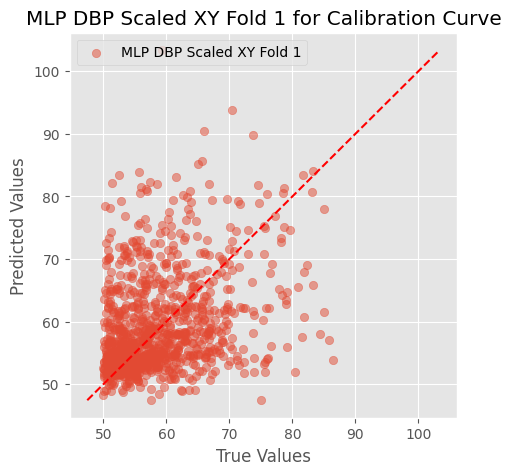

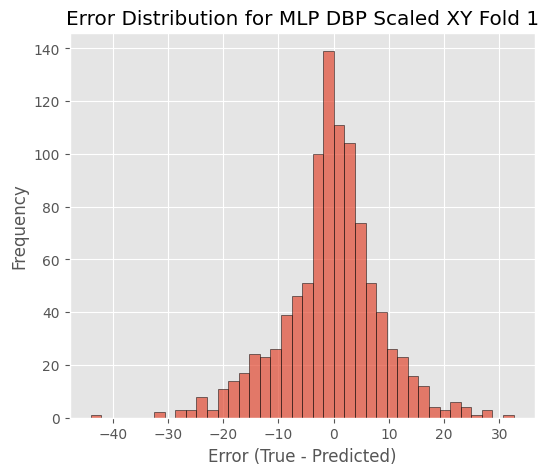

                      Model       R^2       MSE      RMSE       MAE
0  MLP DBP Scaled XY Fold 2 -0.199009  68.78907  8.293918  6.253714


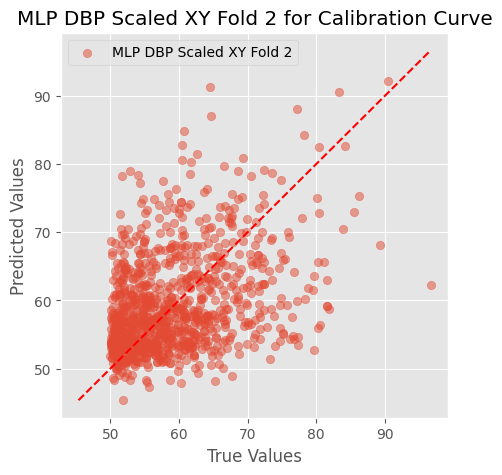

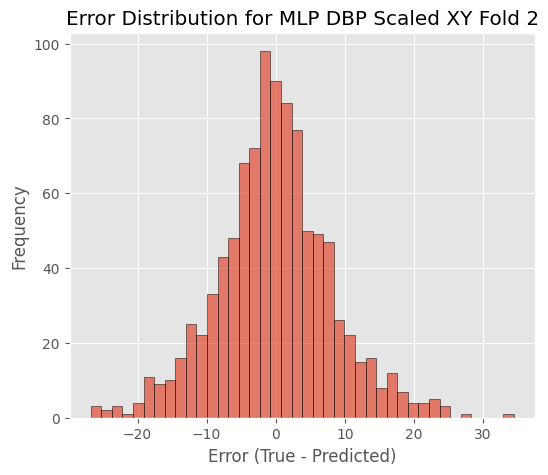

                      Model       R^2        MSE     RMSE       MAE
0  MLP DBP Scaled XY Fold 3 -0.427361  74.869576  8.65272  6.231696


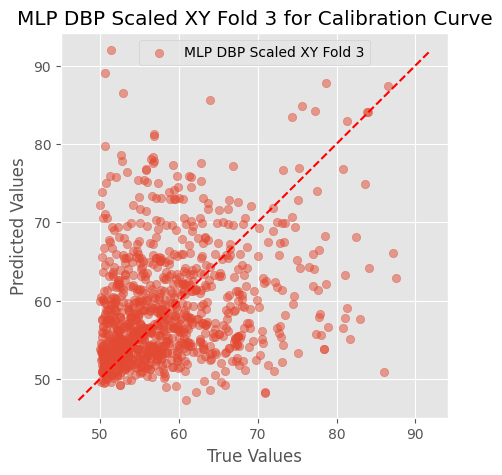

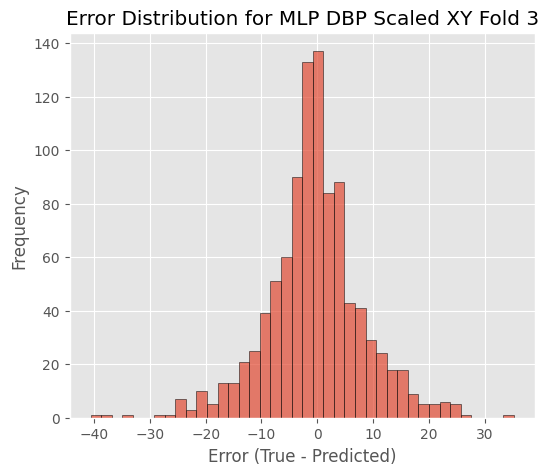

                      Model       R^2        MSE      RMSE      MAE
0  MLP DBP Scaled XY Fold 4 -0.321859  76.568092  8.750319  6.21214


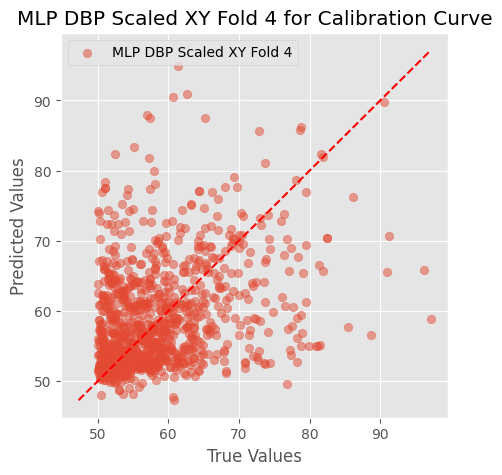

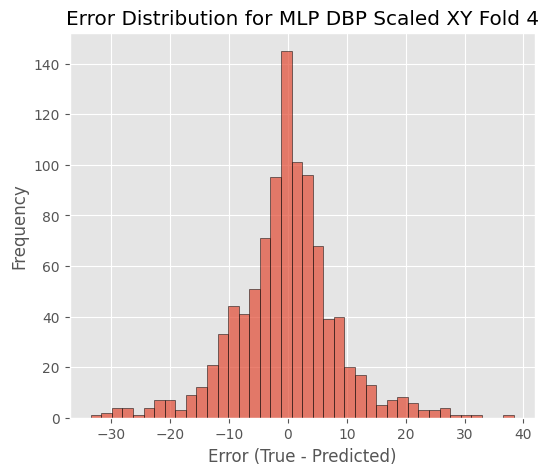

                      Model       R^2       MSE      RMSE       MAE
0  MLP DBP Scaled XY Fold 5 -0.365638  74.53466  8.633346  6.084346


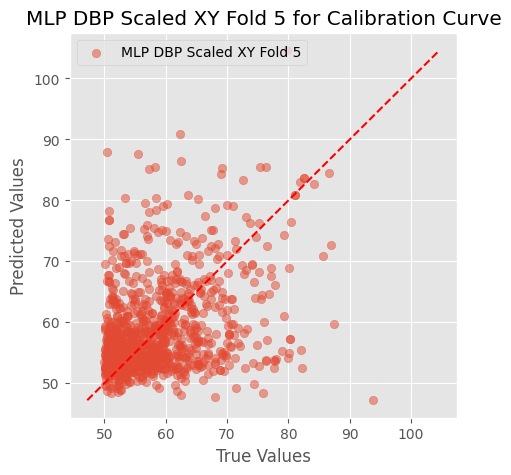

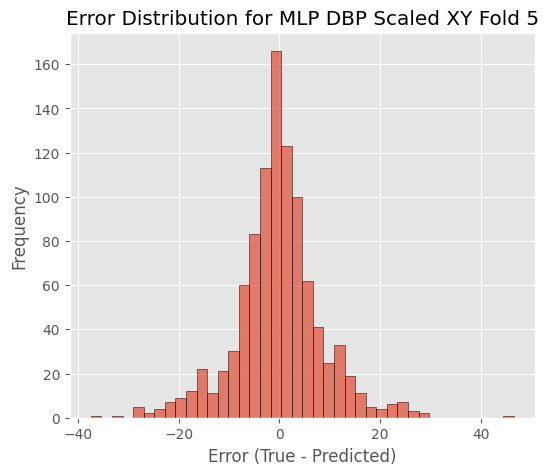


MLP DBP Scaled XY Mean ± Std over 5 folds:
R^2: -0.3690 ± 0.1103
MSE: 74.7724 ± 3.4007
RMSE: 8.6448 ± 0.1982
MAE: 6.2449 ± 0.1151

MLP DBP Scaled XY BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.503e+01%
Percent within 10 mmHg: 7.931e+01%
Percent within 15 mmHg: 9.070e+01%

MLP DBP Scaled XY AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.632e-01
Standard Deviation (mmHg): 8.64
Pass/Fail: Fail


In [25]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # DBP
    cross_val_regression(
        MLPRegressor, X_scaled, dbp.values, label="MLP DBP Scaled XY",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=dbp_scaler
    )

                      Model       R^2         MSE       RMSE        MAE
0  MLP SBP Scaled XY Fold 1 -0.168645  424.289459  20.598288  15.680354


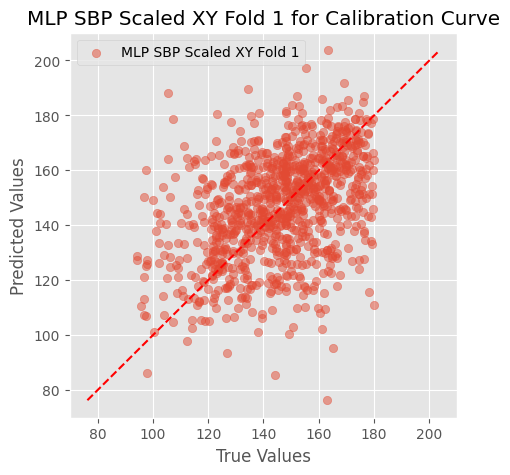

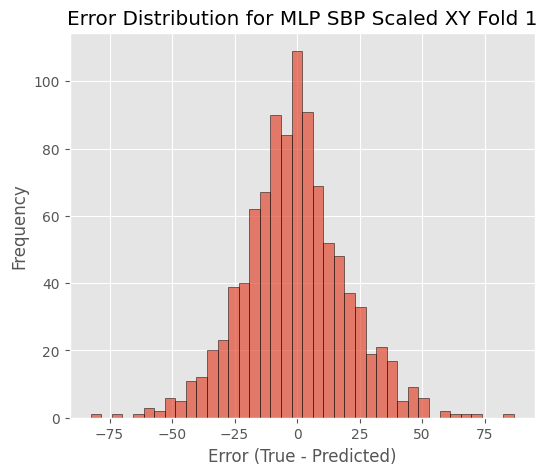

                      Model       R^2         MSE       RMSE        MAE
0  MLP SBP Scaled XY Fold 2 -0.100392  392.807953  19.819384  14.883514


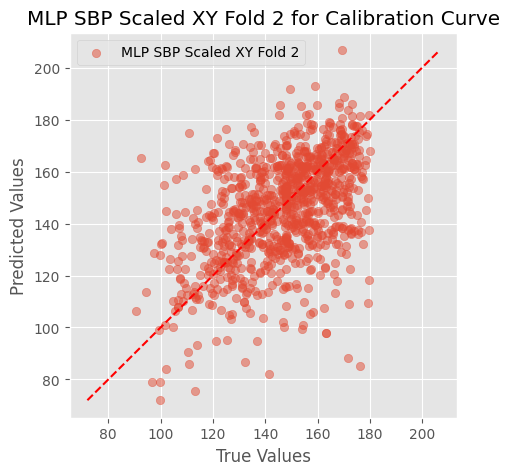

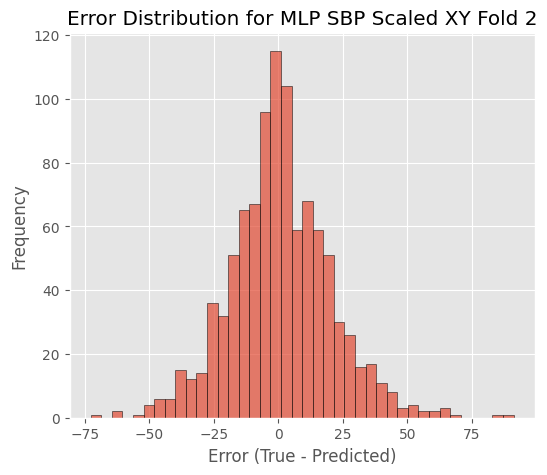

                      Model       R^2         MSE       RMSE        MAE
0  MLP SBP Scaled XY Fold 3 -0.056634  400.706451  20.017654  15.065091


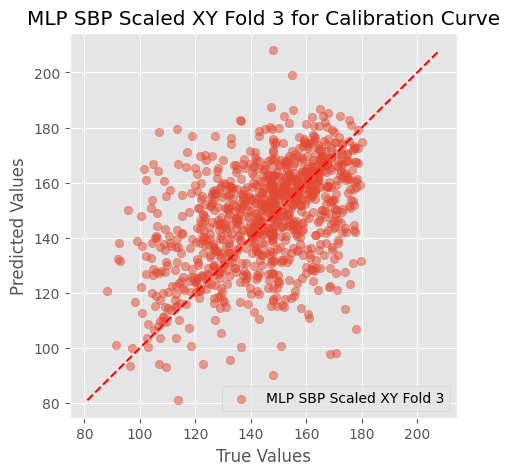

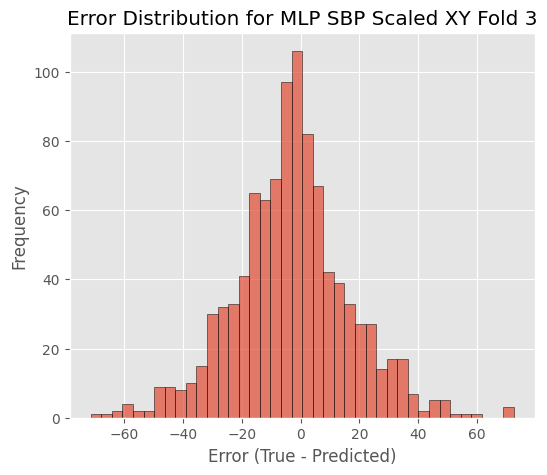

                      Model      R^2         MSE       RMSE        MAE
0  MLP SBP Scaled XY Fold 4 -0.19805  430.334442  20.744503  15.706642


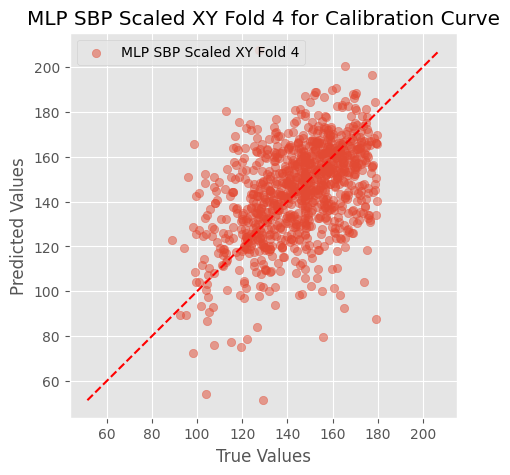

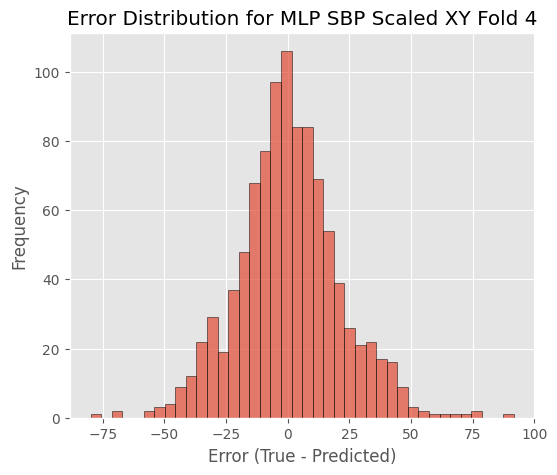

                      Model      R^2         MSE       RMSE        MAE
0  MLP SBP Scaled XY Fold 5 -0.17306  427.334808  20.672077  15.367234


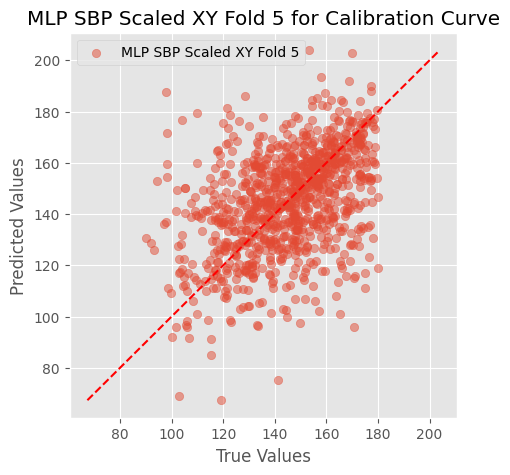

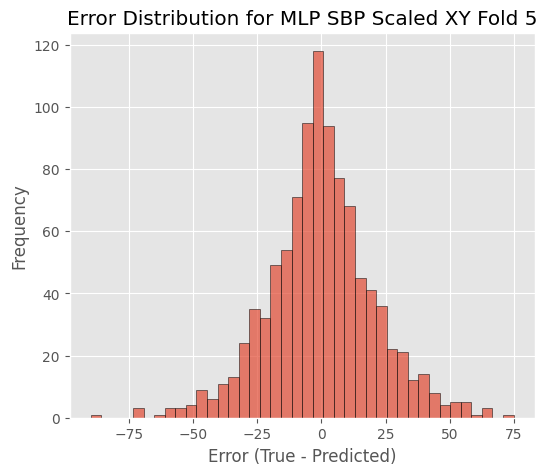


MLP SBP Scaled XY Mean ± Std over 5 folds:
R^2: -0.1394 ± 0.0525
MSE: 415.0946 ± 15.2992
RMSE: 20.3704 ± 0.3771
MAE: 15.3406 ± 0.3271

MLP SBP Scaled XY BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.493e+01%
Percent within 10 mmHg: 4.396e+01%
Percent within 15 mmHg: 5.911e+01%

MLP SBP Scaled XY AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -5.752e-01
Standard Deviation (mmHg): 20.32
Pass/Fail: Fail


In [26]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # SBP
    cross_val_regression(
        MLPRegressor, X_scaled, sbp.values, label="MLP SBP Scaled XY",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=sbp_scaler
    )

# Results

In [27]:
os.makedirs('results', exist_ok=True)
all_results_df = pd.DataFrame(ALL_RESULTS, columns=ALL_RESULTS_COLUMNS)
all_results_df.to_csv('results/results_all.csv', index=False)

In [28]:
dbp_results_df = all_results_df[all_results_df['Model'].str.contains('DBP')]
sbp_results_df = all_results_df[all_results_df['Model'].str.contains('SBP')]
dbp_results_df.to_csv('results/results_dbp.csv', index=False)
sbp_results_df.to_csv('results/results_sbp.csv', index=False)

## DBP Results

In [29]:
dbp_results_df

Model       R^2  R^2 StdErr        MSE  MSE StdErr  \
0   Linear Regression DBP  0.228563    0.011859  42.211811    0.376627   
2       Random Forest DBP  0.307360    0.015166  37.888844    0.539063   
4             XGBoost DBP  0.227828    0.016496  42.245444    0.642047   
6                 SVM DBP  0.014909    0.005809  53.978565    1.138790   
8            CatBoost DBP  0.298458    0.012251  38.386389    0.446351   
10                MLP DBP  0.132204    0.013244  47.529820    1.027365   
12      MLP DBP Scaled XY -0.369012    0.049333  74.772420    1.520854   

        RMSE  RMSE StdErr       MAE  MAE StdErr BHS Grade  ...  \
0   6.496735     0.029142  5.022640    0.024156         B  ...   
2   6.154620     0.043581  4.596927    0.020415         A  ...   
4   6.498716     0.049261  4.800016    0.035940         A  ...   
6   7.344972     0.077402  5.383626    0.050884         B  ...   
8   6.195152     0.035997  4.644788    0.012177         A  ...   
10  6.892183     0.074346  5.258559    0.028347         B  ...   
12  8.644832     0.088651  6.244929    0.051477         B  ...   

    AAMI Pass/Fail  AAMI Mean Error (mmHg)  AAMI Mean Error StdErr  \
0             Pass               -0.005892                0.088487   
2             Pass               -0.151796                0.069054   
4             Pass                0.006689                0.053855   
6             Pass                1.722808                0.115760   
8             Pass               -0.015110                0.063605   
10            Pass                0.511144                0.412665   
12            Fail               -0.363186                0.062250   

    AAMI Std Dev (mmHg)  AAMI Std Dev StdErr  Avg Inference Time (ms)  \
0              6.496974             0.030484                 0.118229   
2              6.153883             0.044702                 4.683531   
4              6.500880             0.049385                 1.073062   
6              7.139554             0.066080                 0.660286   
8              6.196625             0.036344                 2.272972   
10             6.814166             0.079014                 0.166501   
12             8.640550             0.086671                 0.205272   

   Inference Time StdErr  Inference Time Std (ms)  Model Size (bytes)  \
0               0.009963                 0.704493               712.0   
2               0.047683                 3.371722          35855799.6   
4               0.062398                 4.412238            411910.4   
6               0.023051                 1.629962           1142444.6   
8               0.036469                 2.578779           1127186.8   
10              0.011025                 0.779576            116701.8   
12              0.012828                 0.907069            117024.4   

    Model Size StdErr  
0            0.000000  
2         5529.689999  
4         1945.015159  
6         1440.954173  
8           30.492491  
10         160.029097  
12         115.350804  

[7 rows x 26 columns]

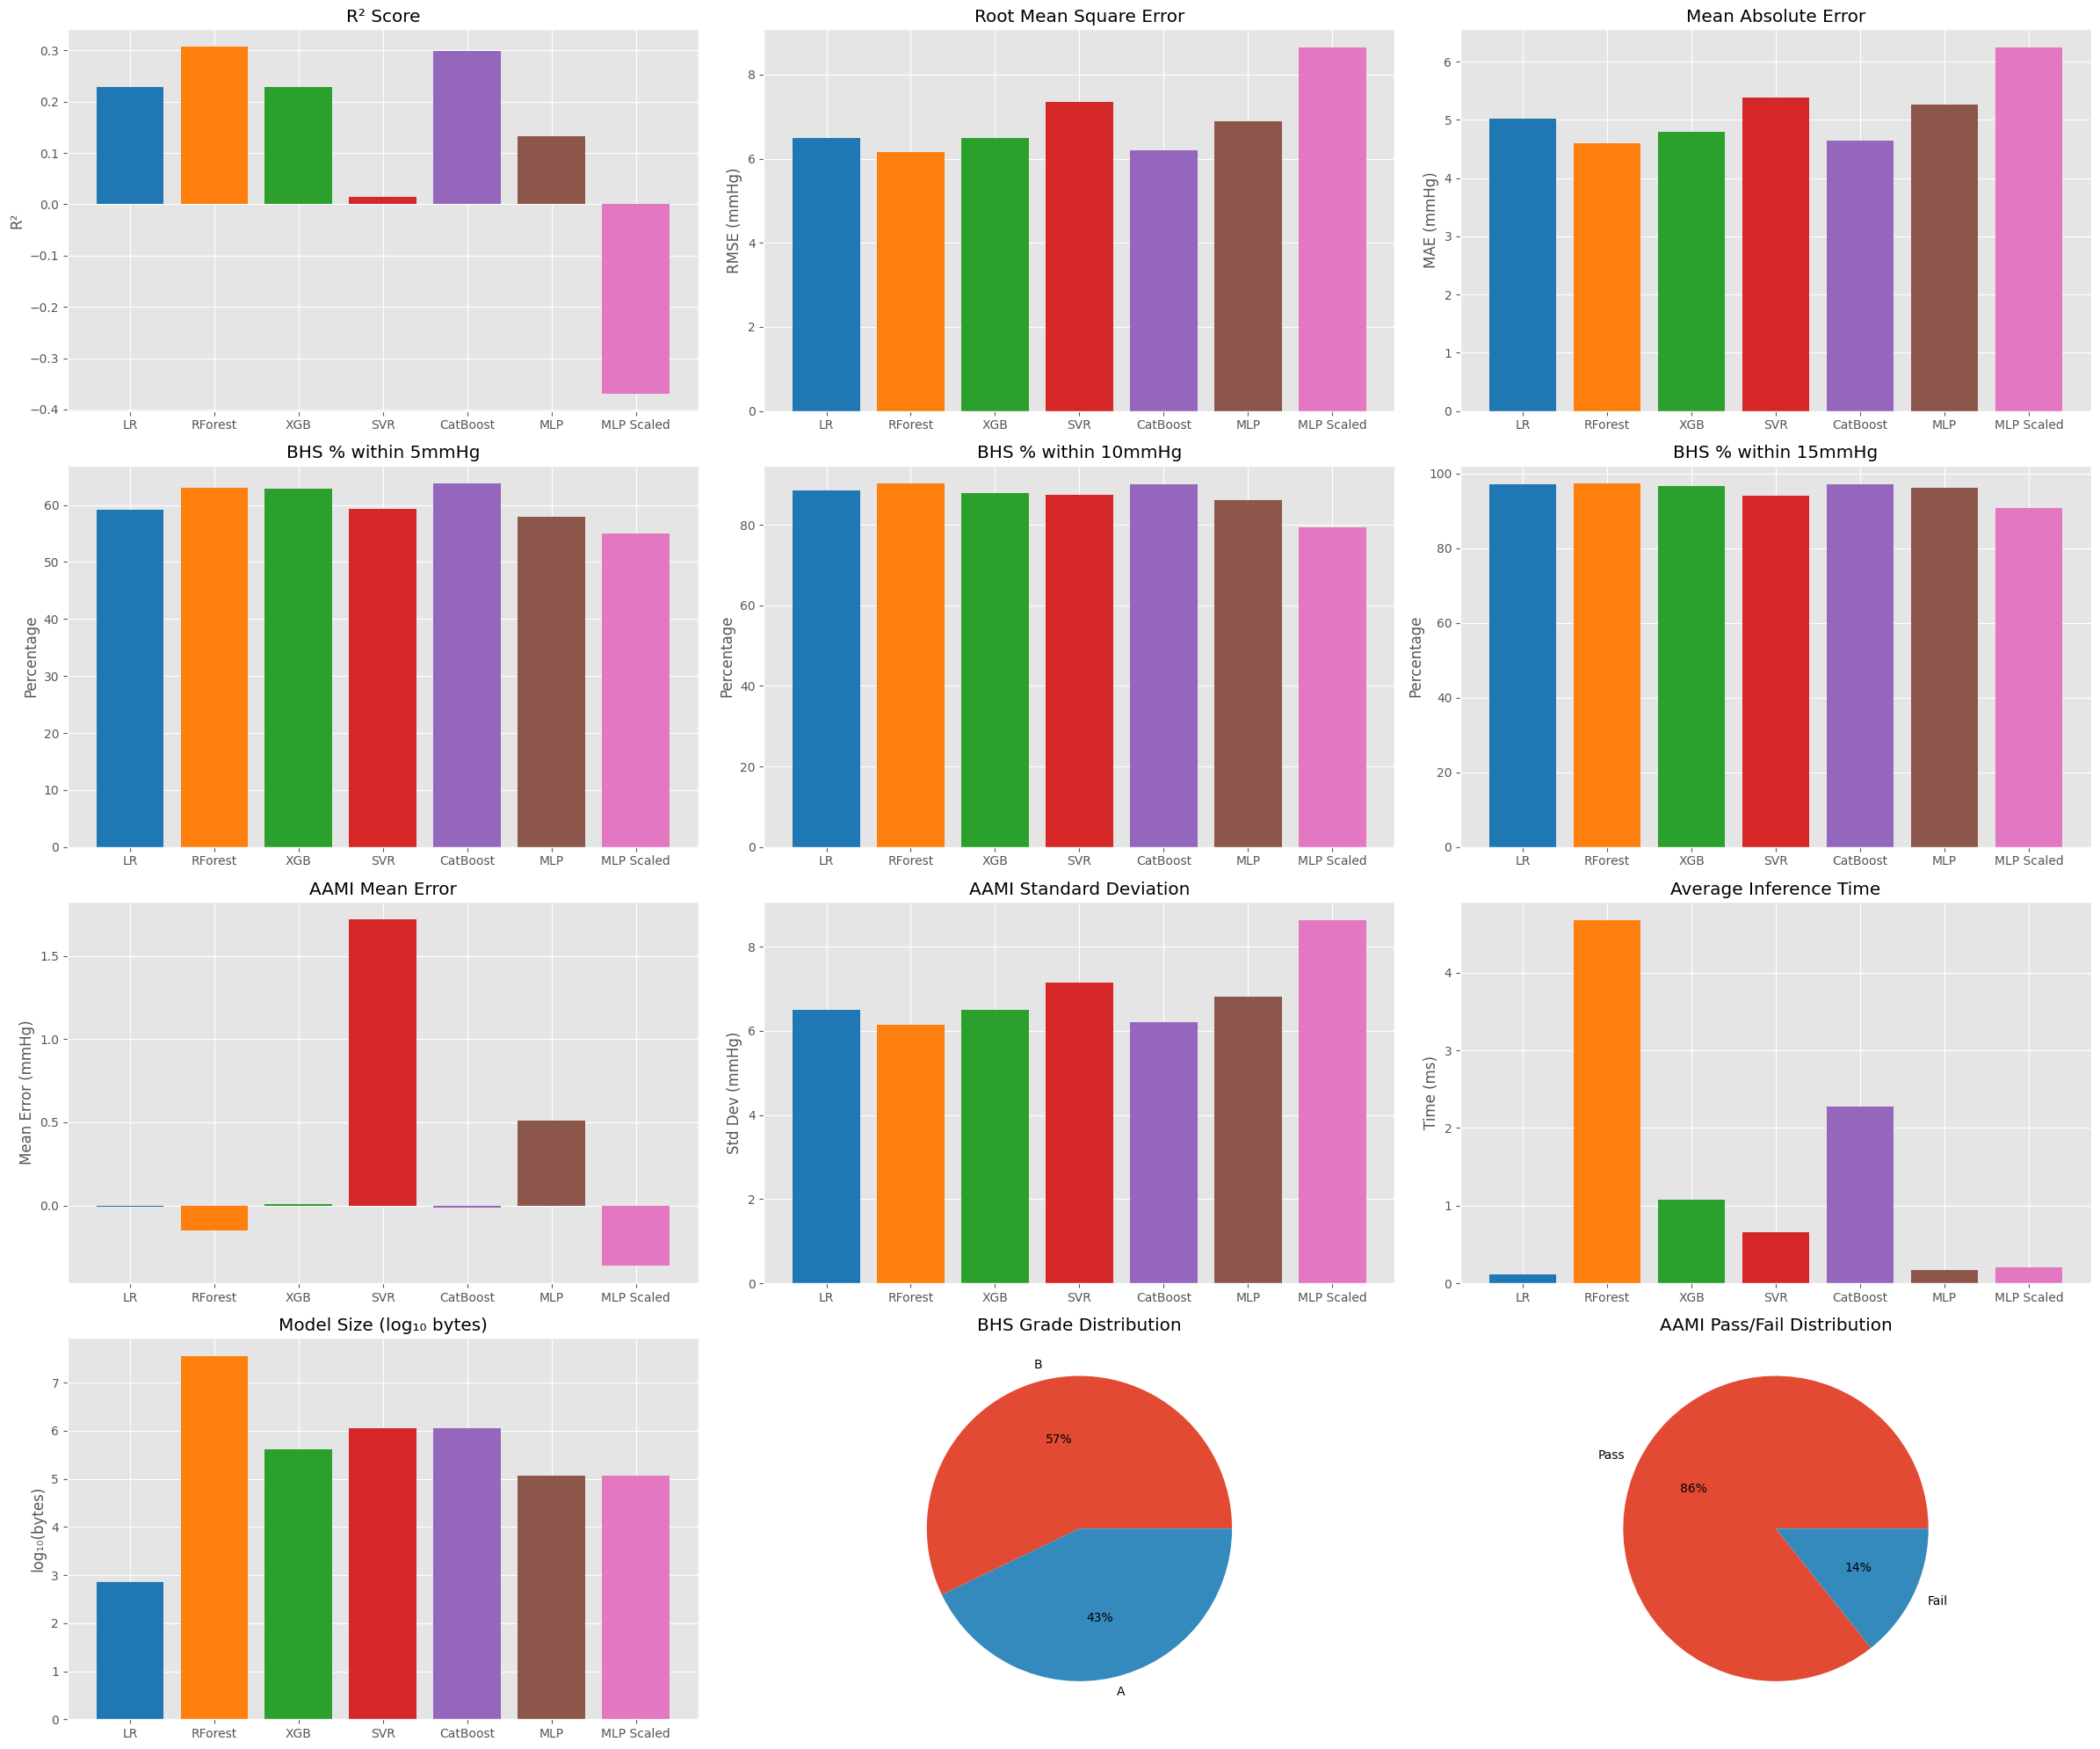

In [37]:
# Create a mosaic plot for DBP results
fig = plt.figure(figsize=(24, 20))

# Define the mosaic layout
mosaic = [
    ['r2', 'rmse', 'mae'],
    ['bhs_5', 'bhs_10', 'bhs_15'],
    ['aami_mean', 'aami_std', 'inference'],
    ['size', 'grade', 'pass_fail']
]

axes = fig.subplot_mosaic(mosaic)

# Extract data for plotting
models = [
    'LR', 'RForest', 'XGB', 'SVR', 'CatBoost', 'MLP', 'MLP Scaled'
]

colors = plt.cm.tab10(np.arange(len(models)))

# R² Score
axes['r2'].bar(models, dbp_results_df['R^2'], color=colors)
axes['r2'].set_title('R² Score')
axes['r2'].set_ylabel('R²')
axes['r2'].tick_params(axis='x')

# RMSE
axes['rmse'].bar(models, dbp_results_df['RMSE'], color=colors)
axes['rmse'].set_title('Root Mean Square Error')
axes['rmse'].set_ylabel('RMSE (mmHg)')
axes['rmse'].tick_params(axis='x')

# MAE
axes['mae'].bar(models, dbp_results_df['MAE'], color=colors)
axes['mae'].set_title('Mean Absolute Error')
axes['mae'].set_ylabel('MAE (mmHg)')
axes['mae'].tick_params(axis='x')

# BHS % within 5mmHg
axes['bhs_5'].bar(models, dbp_results_df['BHS % within 5mmHg'], color=colors)
axes['bhs_5'].set_title('BHS % within 5mmHg')
axes['bhs_5'].set_ylabel('Percentage')
axes['bhs_5'].tick_params(axis='x')

# BHS % within 10mmHg
axes['bhs_10'].bar(models, dbp_results_df['BHS % within 10mmHg'], color=colors)
axes['bhs_10'].set_title('BHS % within 10mmHg')
axes['bhs_10'].set_ylabel('Percentage')
axes['bhs_10'].tick_params(axis='x')

# BHS % within 15mmHg
axes['bhs_15'].bar(models, dbp_results_df['BHS % within 15mmHg'], color=colors)
axes['bhs_15'].set_title('BHS % within 15mmHg')
axes['bhs_15'].set_ylabel('Percentage')
axes['bhs_15'].tick_params(axis='x')

# AAMI Mean Error
axes['aami_mean'].bar(models, dbp_results_df['AAMI Mean Error (mmHg)'], color=colors)
axes['aami_mean'].set_title('AAMI Mean Error')
axes['aami_mean'].set_ylabel('Mean Error (mmHg)')
axes['aami_mean'].tick_params(axis='x')

# AAMI Std Dev
axes['aami_std'].bar(models, dbp_results_df['AAMI Std Dev (mmHg)'], color=colors)
axes['aami_std'].set_title('AAMI Standard Deviation')
axes['aami_std'].set_ylabel('Std Dev (mmHg)')
axes['aami_std'].tick_params(axis='x')

# Inference Time with error bars
axes['inference'].bar(models, dbp_results_df['Avg Inference Time (ms)'], color=colors)
axes['inference'].set_title('Average Inference Time')
axes['inference'].set_ylabel('Time (ms)')
axes['inference'].tick_params(axis='x')

# Model Size (log scale)
axes['size'].bar(models, np.log10(dbp_results_df['Model Size (bytes)']), color=colors)
axes['size'].set_title('Model Size (log₁₀ bytes)')
axes['size'].set_ylabel('log₁₀(bytes)')
axes['size'].tick_params(axis='x')

# BHS Grade distribution
grade_counts = dbp_results_df['BHS Grade'].value_counts()
axes['grade'].pie(grade_counts.values, labels=grade_counts.index, autopct='%1.0f%%')
axes['grade'].set_title('BHS Grade Distribution')

# AAMI Pass/Fail distribution
pass_fail_counts = dbp_results_df['AAMI Pass/Fail'].value_counts()
axes['pass_fail'].pie(pass_fail_counts.values, labels=pass_fail_counts.index, autopct='%1.0f%%')
axes['pass_fail'].set_title('AAMI Pass/Fail Distribution')

plt.tight_layout()
plt.savefig('figures/dbp_results_mosaic.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## SBP Results

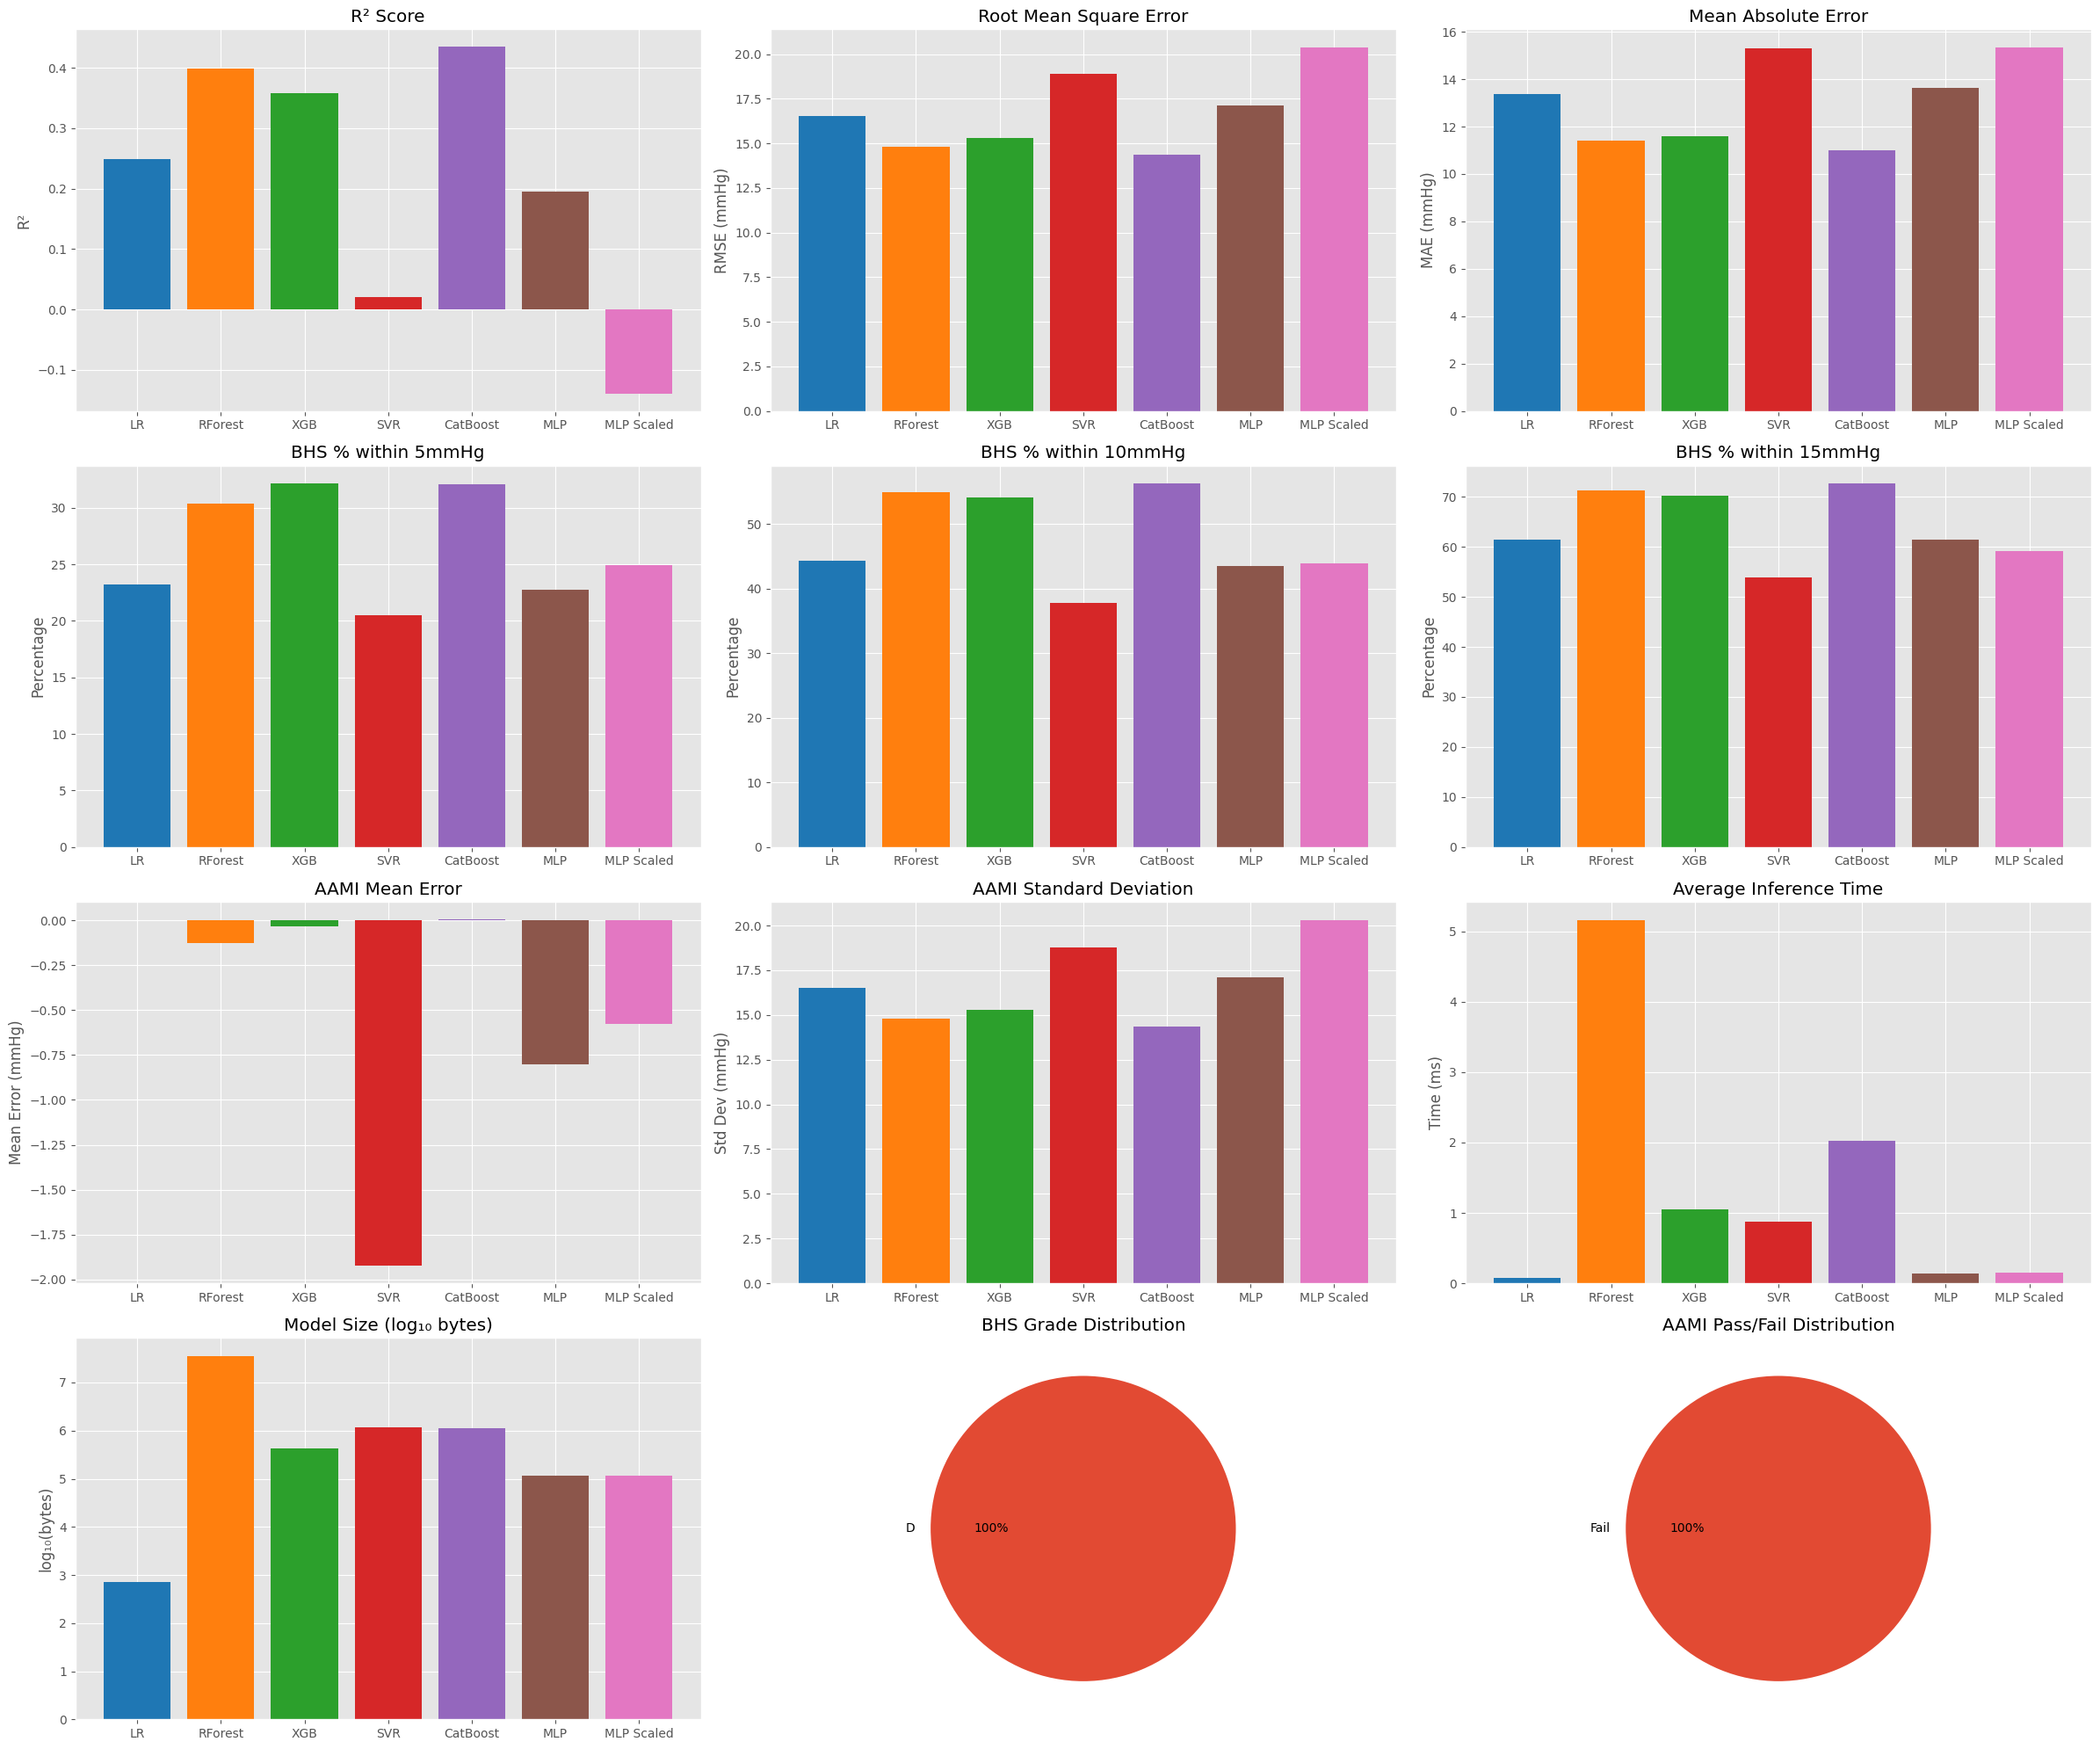

In [38]:
# Create a mosaic plot for SBP results
fig = plt.figure(figsize=(24, 20))

# Define the mosaic layout
mosaic = [
    ['r2', 'rmse', 'mae'],
    ['bhs_5', 'bhs_10', 'bhs_15'],
    ['aami_mean', 'aami_std', 'inference'],
    ['size', 'grade', 'pass_fail']
]

axes = fig.subplot_mosaic(mosaic)

# Extract data for plotting
models = [
    'LR', 'RForest', 'XGB', 'SVR', 'CatBoost', 'MLP', 'MLP Scaled'
]

colors = plt.cm.tab10(np.arange(len(models)))

# R² Score
axes['r2'].bar(models, sbp_results_df['R^2'], color=colors)
axes['r2'].set_title('R² Score')
axes['r2'].set_ylabel('R²')
axes['r2'].tick_params(axis='x')

# RMSE
axes['rmse'].bar(models, sbp_results_df['RMSE'], color=colors)
axes['rmse'].set_title('Root Mean Square Error')
axes['rmse'].set_ylabel('RMSE (mmHg)')
axes['rmse'].tick_params(axis='x')

# MAE
axes['mae'].bar(models, sbp_results_df['MAE'], color=colors)
axes['mae'].set_title('Mean Absolute Error')
axes['mae'].set_ylabel('MAE (mmHg)')
axes['mae'].tick_params(axis='x')

# BHS % within 5mmHg
axes['bhs_5'].bar(models, sbp_results_df['BHS % within 5mmHg'], color=colors)
axes['bhs_5'].set_title('BHS % within 5mmHg')
axes['bhs_5'].set_ylabel('Percentage')
axes['bhs_5'].tick_params(axis='x')

# BHS % within 10mmHg
axes['bhs_10'].bar(models, sbp_results_df['BHS % within 10mmHg'], color=colors)
axes['bhs_10'].set_title('BHS % within 10mmHg')
axes['bhs_10'].set_ylabel('Percentage')
axes['bhs_10'].tick_params(axis='x')

# BHS % within 15mmHg
axes['bhs_15'].bar(models, sbp_results_df['BHS % within 15mmHg'], color=colors)
axes['bhs_15'].set_title('BHS % within 15mmHg')
axes['bhs_15'].set_ylabel('Percentage')
axes['bhs_15'].tick_params(axis='x')

# AAMI Mean Error
axes['aami_mean'].bar(models, sbp_results_df['AAMI Mean Error (mmHg)'], color=colors)
axes['aami_mean'].set_title('AAMI Mean Error')
axes['aami_mean'].set_ylabel('Mean Error (mmHg)')
axes['aami_mean'].tick_params(axis='x')

# AAMI Std Dev
axes['aami_std'].bar(models, sbp_results_df['AAMI Std Dev (mmHg)'], color=colors)
axes['aami_std'].set_title('AAMI Standard Deviation')
axes['aami_std'].set_ylabel('Std Dev (mmHg)')
axes['aami_std'].tick_params(axis='x')

# Inference Time with error bars
axes['inference'].bar(models, sbp_results_df['Avg Inference Time (ms)'], color=colors)
axes['inference'].set_title('Average Inference Time')
axes['inference'].set_ylabel('Time (ms)')
axes['inference'].tick_params(axis='x')

# Model Size (log scale)
axes['size'].bar(models, np.log10(sbp_results_df['Model Size (bytes)']), color=colors)
axes['size'].set_title('Model Size (log₁₀ bytes)')
axes['size'].set_ylabel('log₁₀(bytes)')
axes['size'].tick_params(axis='x')

# BHS Grade distribution
grade_counts = sbp_results_df['BHS Grade'].value_counts()
axes['grade'].pie(grade_counts.values, labels=grade_counts.index, autopct='%1.0f%%')
axes['grade'].set_title('BHS Grade Distribution')

# AAMI Pass/Fail distribution
pass_fail_counts = sbp_results_df['AAMI Pass/Fail'].value_counts()
axes['pass_fail'].pie(pass_fail_counts.values, labels=pass_fail_counts.index, autopct='%1.0f%%')
axes['pass_fail'].set_title('AAMI Pass/Fail Distribution')

plt.tight_layout()
plt.savefig('figures/sbp_results_mosaic.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()